## Understanding Problem and Dataset

#### Hypothesis Generation

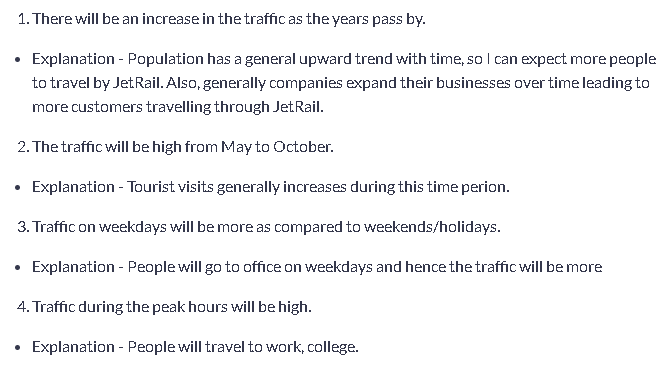

#### Getting system ready and loading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Lets make a copy of train and test data so that even if we do changes in these dataset we dont lose the original ones.

In [ ]:
train_original = train.copy()
test_original = test.copy()

#### Dataset Structure and Content

In [ ]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [ ]:
train.shape, test.shape

((18288, 3), (5112, 2))

## Exploration and Preprocessing

#### Feature Extraction

We have to change the data type to datetime format otherwise we cannot extract features from it.

In [ ]:
train["Datetime"] = pd.to_datetime(train.Datetime, format="%d-%m-%Y %H:%M")
test["Datetime"] = pd.to_datetime(test.Datetime, format="%d-%m-%Y %H:%M")
test_original["Datetime"] = test_original["Datetime"] = pd.to_datetime(test_original.Datetime, format="%d-%m-%Y %H:%M")
train_original["Datetime"] = train_original["Datetime"] = pd.to_datetime(train_original.Datetime, format="%d-%m-%Y %H:%M")

In [ ]:
for i in (train, test, train_original, test_original):
    i["year"] = i.Datetime.dt.year
    i["month"] = i.Datetime.dt.month
    i["day"] = i.Datetime.dt.day
    i["Hour"] = i.Datetime.dt.hour

In [ ]:
# Made a hypothesis for the traffic pattern on weekday and weekend as well. Lets make a
#weekend variable to visualize the impact of weekend on traffic
#First extract the day of week from Datetime and then based on the values we will assign whether
# the day is a weekend or not. Values of 5 and 6 represents that the days are weekend.
train["day of week"] = train["Datetime"].dt.dayofweek
temp = train["Datetime"]

In [ ]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train["Datetime"].apply(applyer)
train["weekend"] = temp2

In [ ]:
train.head()

ID            Datetime  Count  year  month  day  Hour  day of week  weekend
0   0 2012-08-25 00:00:00      8  2012      8   25     0            5        1
1   1 2012-08-25 01:00:00      2  2012      8   25     1            5        1
2   2 2012-08-25 02:00:00      6  2012      8   25     2            5        1
3   3 2012-08-25 03:00:00      2  2012      8   25     3            5        1
4   4 2012-08-25 04:00:00      2  2012      8   25     4            5        1

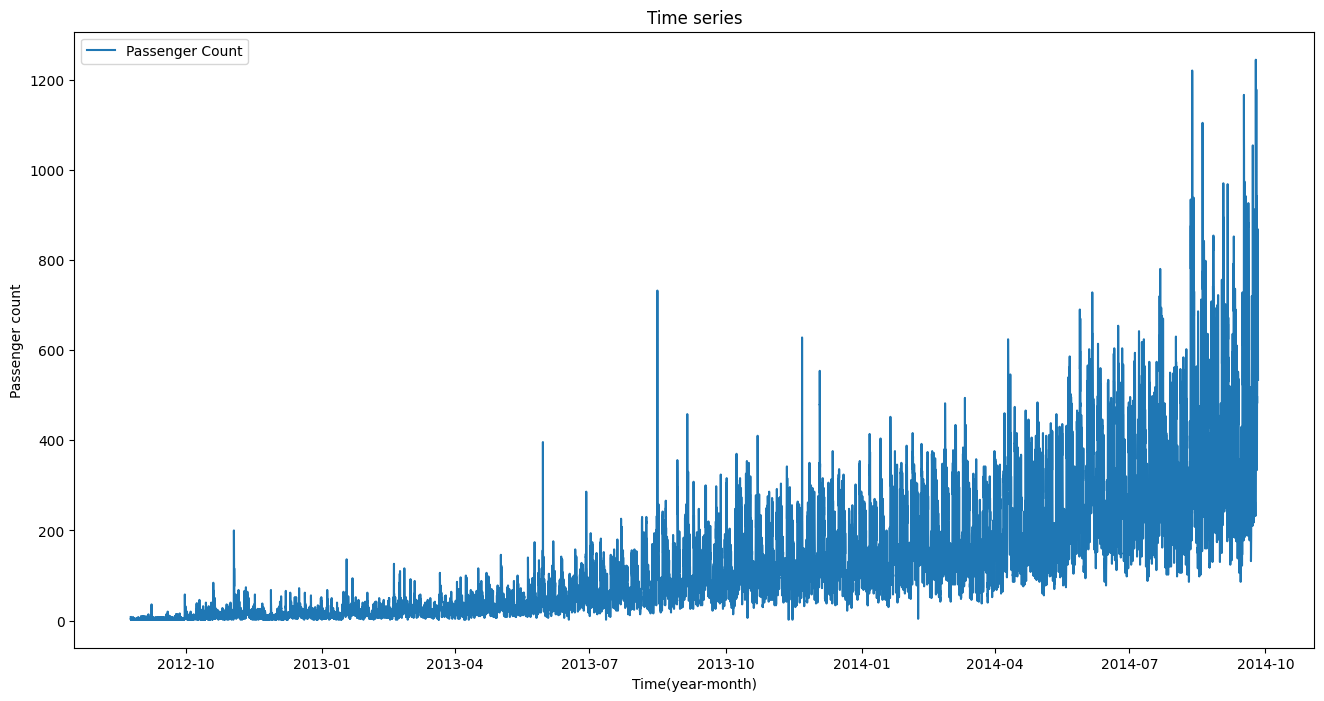

In [ ]:
train.index = train["Datetime"]
#indexing the datetime to get the time period on the x axis
df = train.drop('ID',axis=1)
ts = df["Count"]
plt.figure(figsize=(16,8))
plt.plot(ts, label="Passenger Count")
plt.title("Time series")
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc="best")

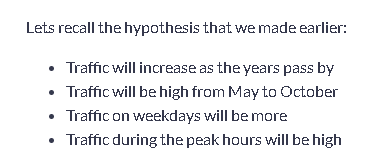

#### Exploratory Analysis
Let us try to verify our hypothesis using the actual data.

<Axes: xlabel='year'>

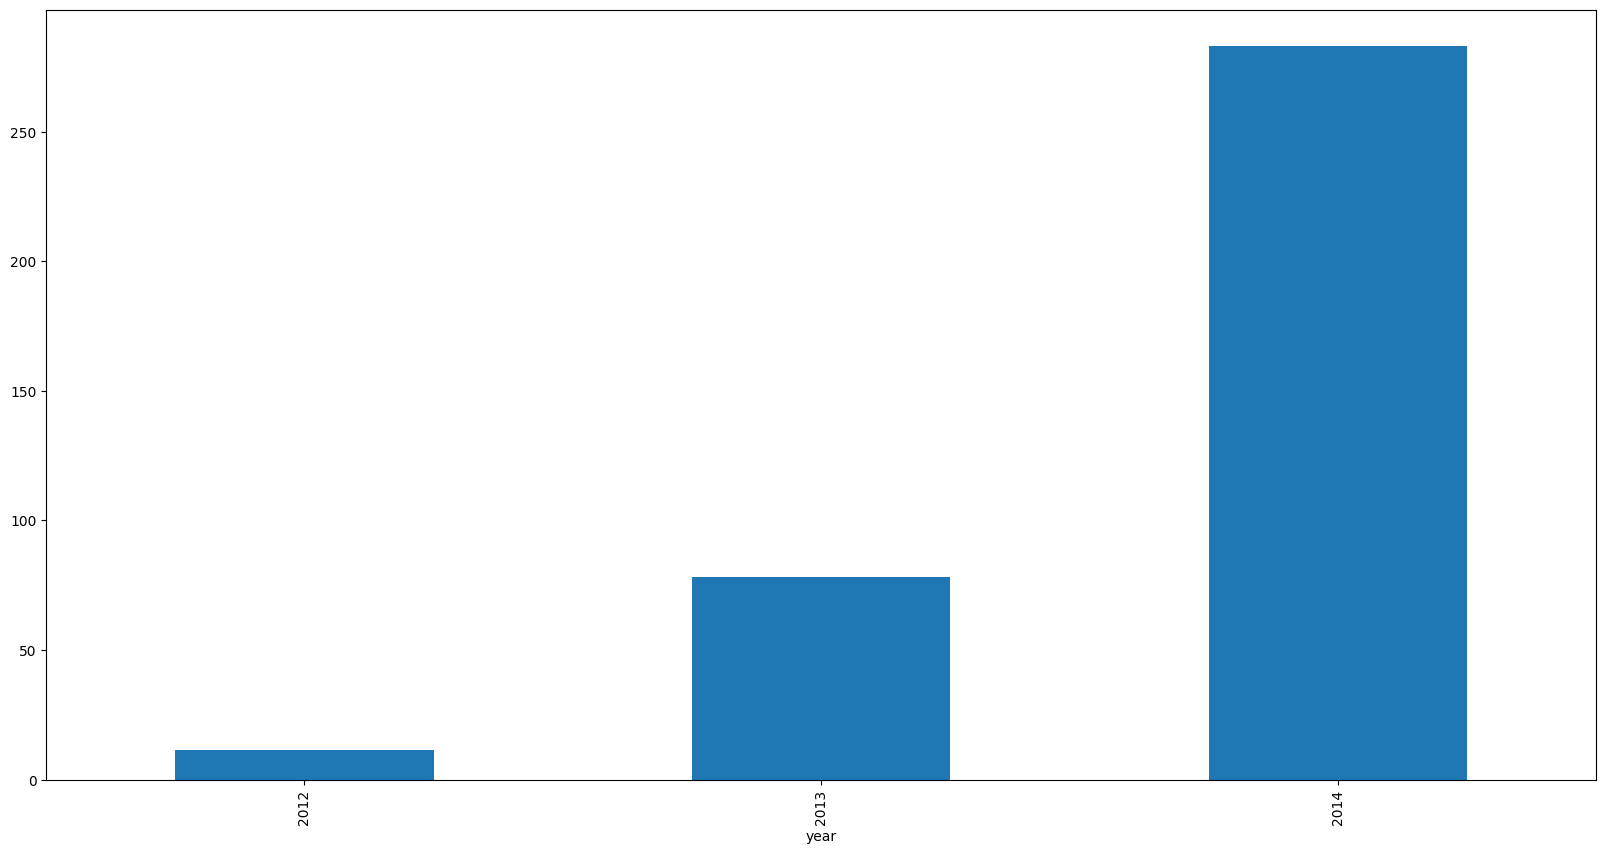

In [ ]:
# Traffic will increase as the years pass by.
train.groupby("year")["Count"].mean().plot.bar()

<Axes: xlabel='month'>

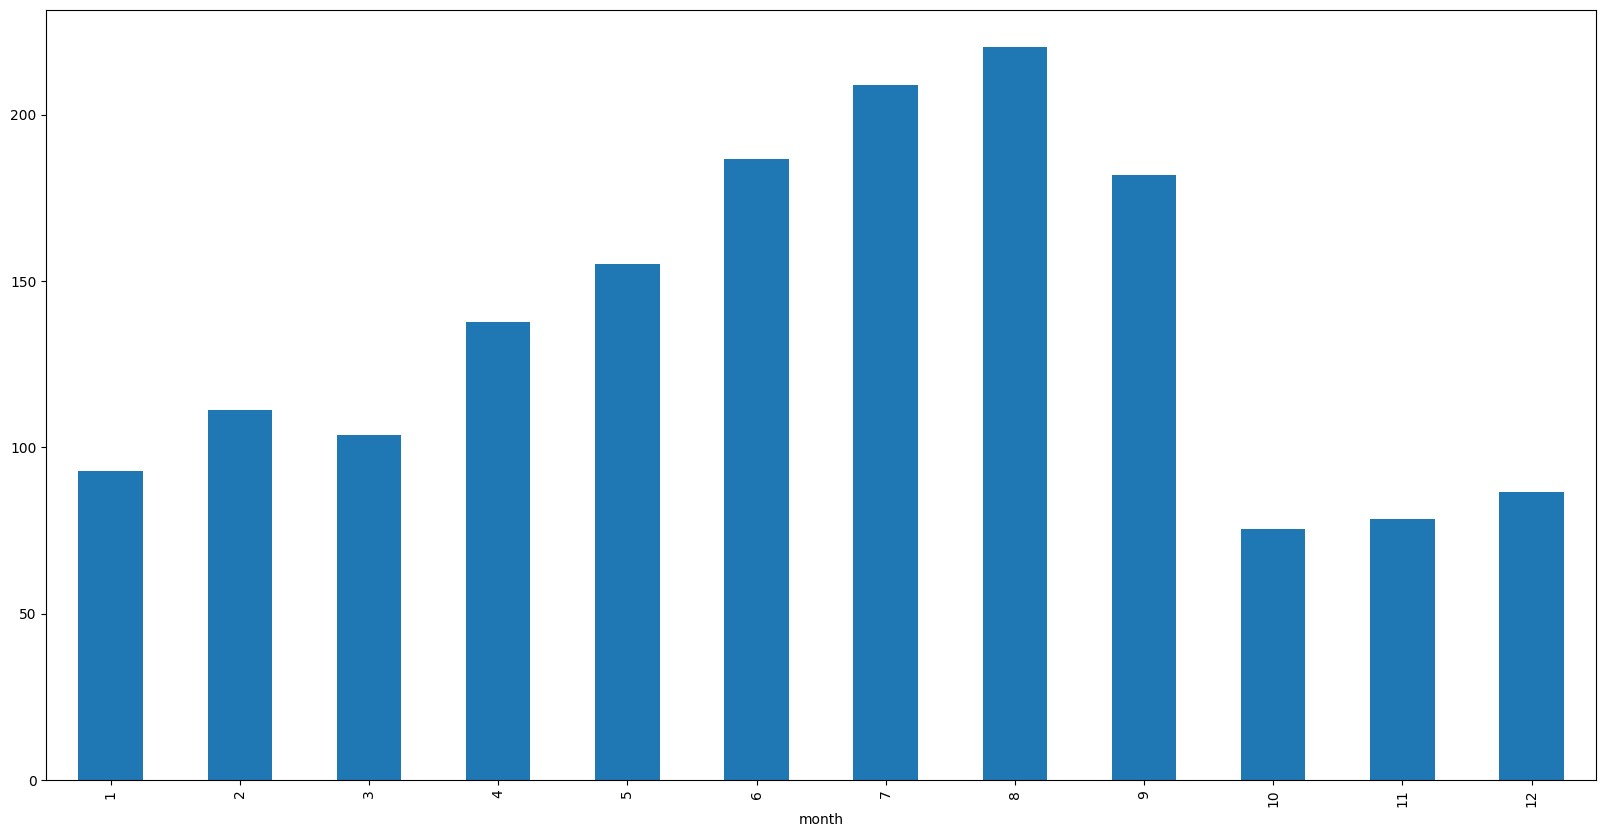

In [ ]:
# increase in traffic from May to October
train.groupby("month")["Count"].mean().plot.bar()

<Axes: title={'center': 'Passenger Count(Monthwise)'}, xlabel='year,month'>

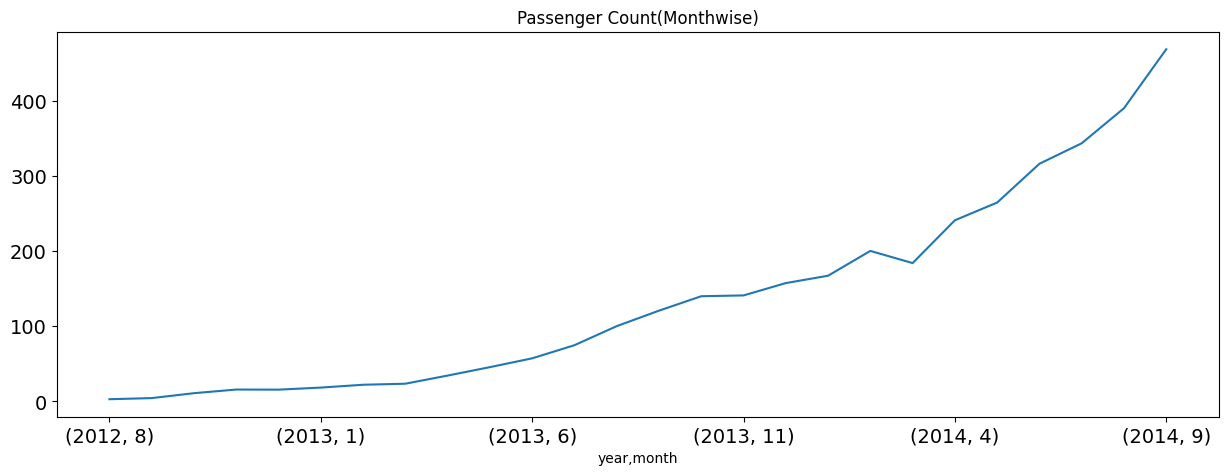

In [ ]:
# Lets look at the monthly mean of each year separately
temp = train.groupby(["year","month"])["Count"].mean()
temp.plot(figsize=(15,5), title="Passenger Count(Monthwise)", fontsize=14)

<Axes: xlabel='day'>

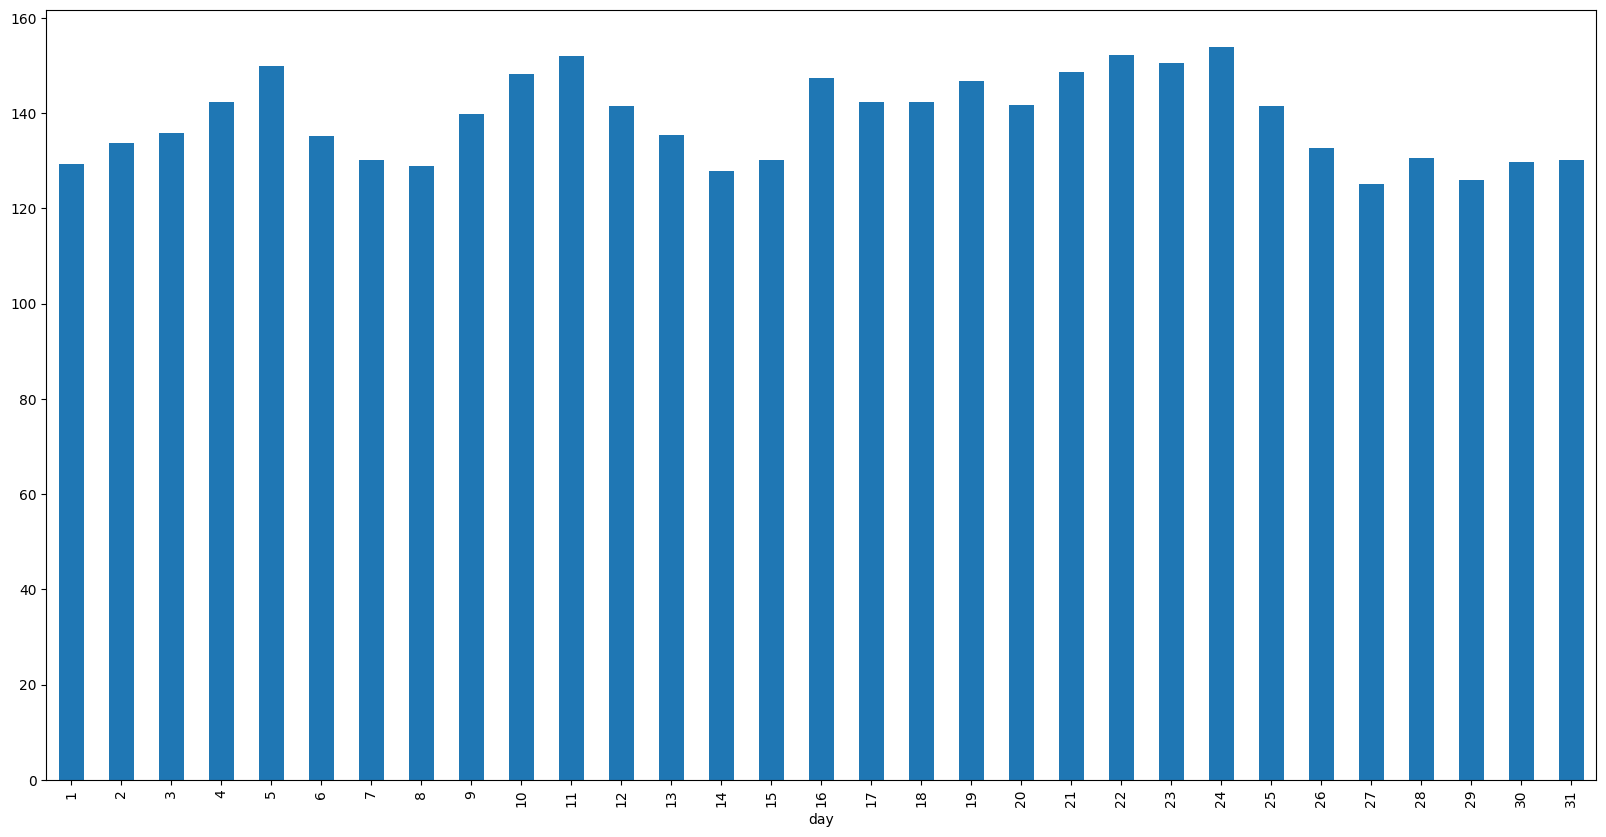

In [ ]:
# Daily mean of passenger count
train.groupby("day")["Count"].mean().plot.bar()

<Axes: xlabel='Hour'>

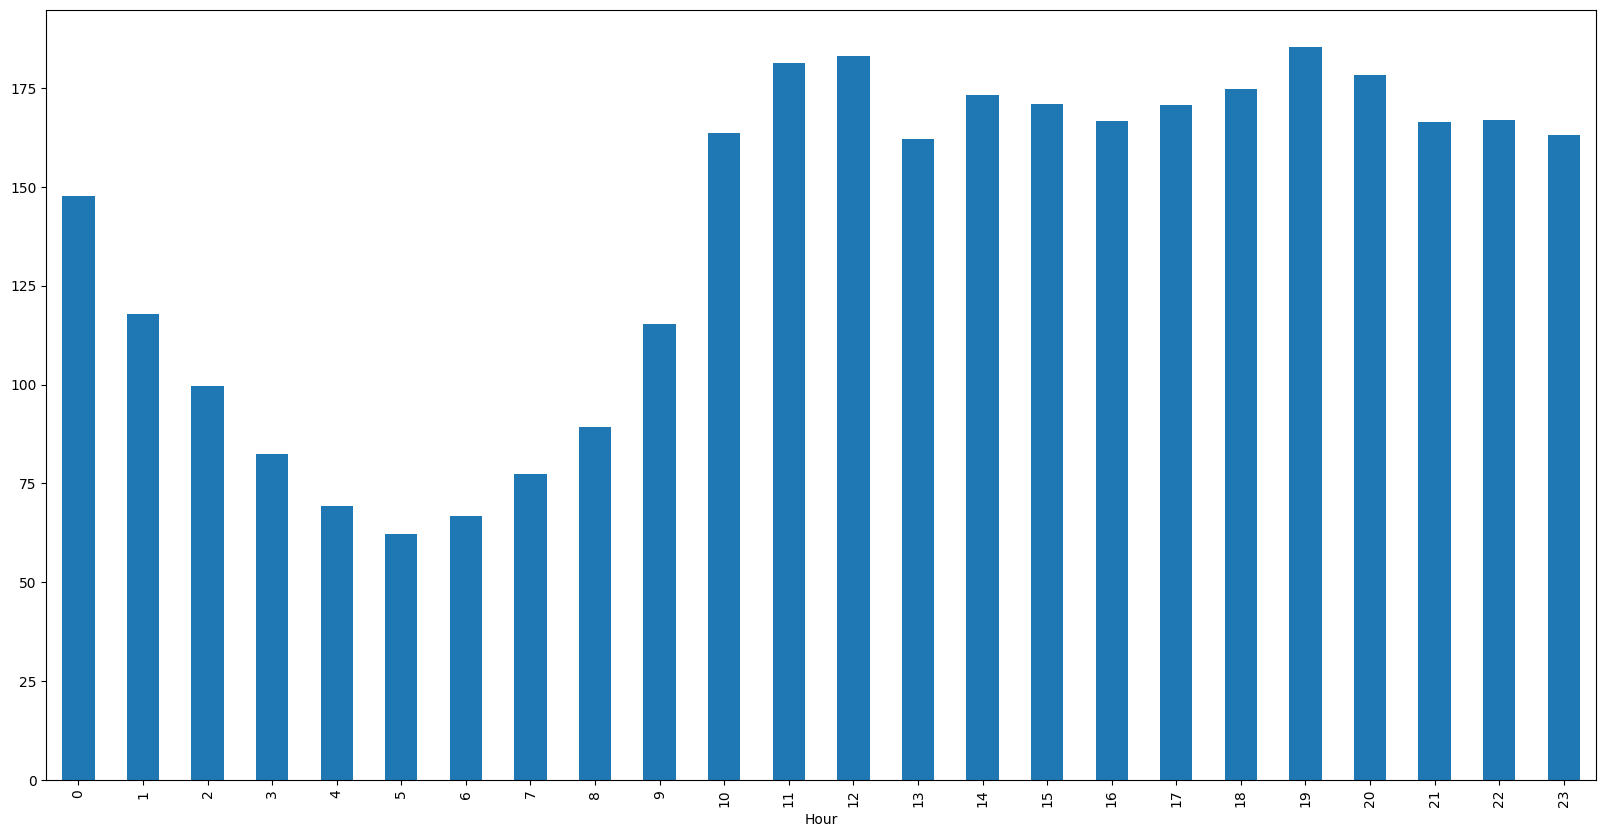

In [ ]:
# also made a hypothesis that the traffic will be more during peak hours
# mean of hourly passenger count
train.groupby("Hour")["Count"].mean().plot.bar()

<Axes: xlabel='weekend'>

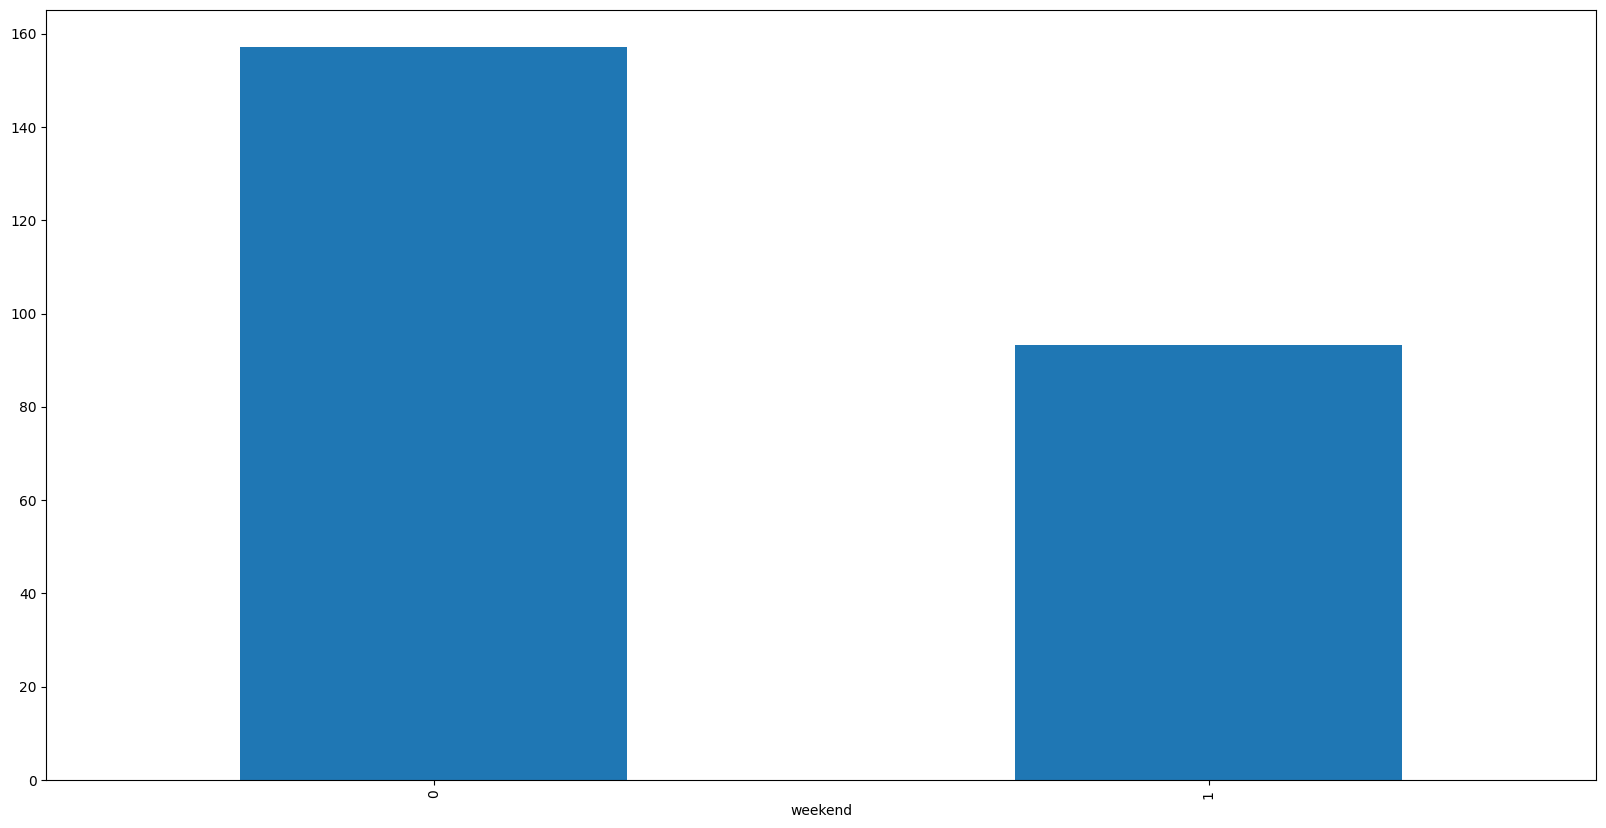

In [ ]:
# Validate our hypothesis which we assumed that the traffic will be more on weekdays
train.groupby("weekend")["Count"].mean().plot.bar()

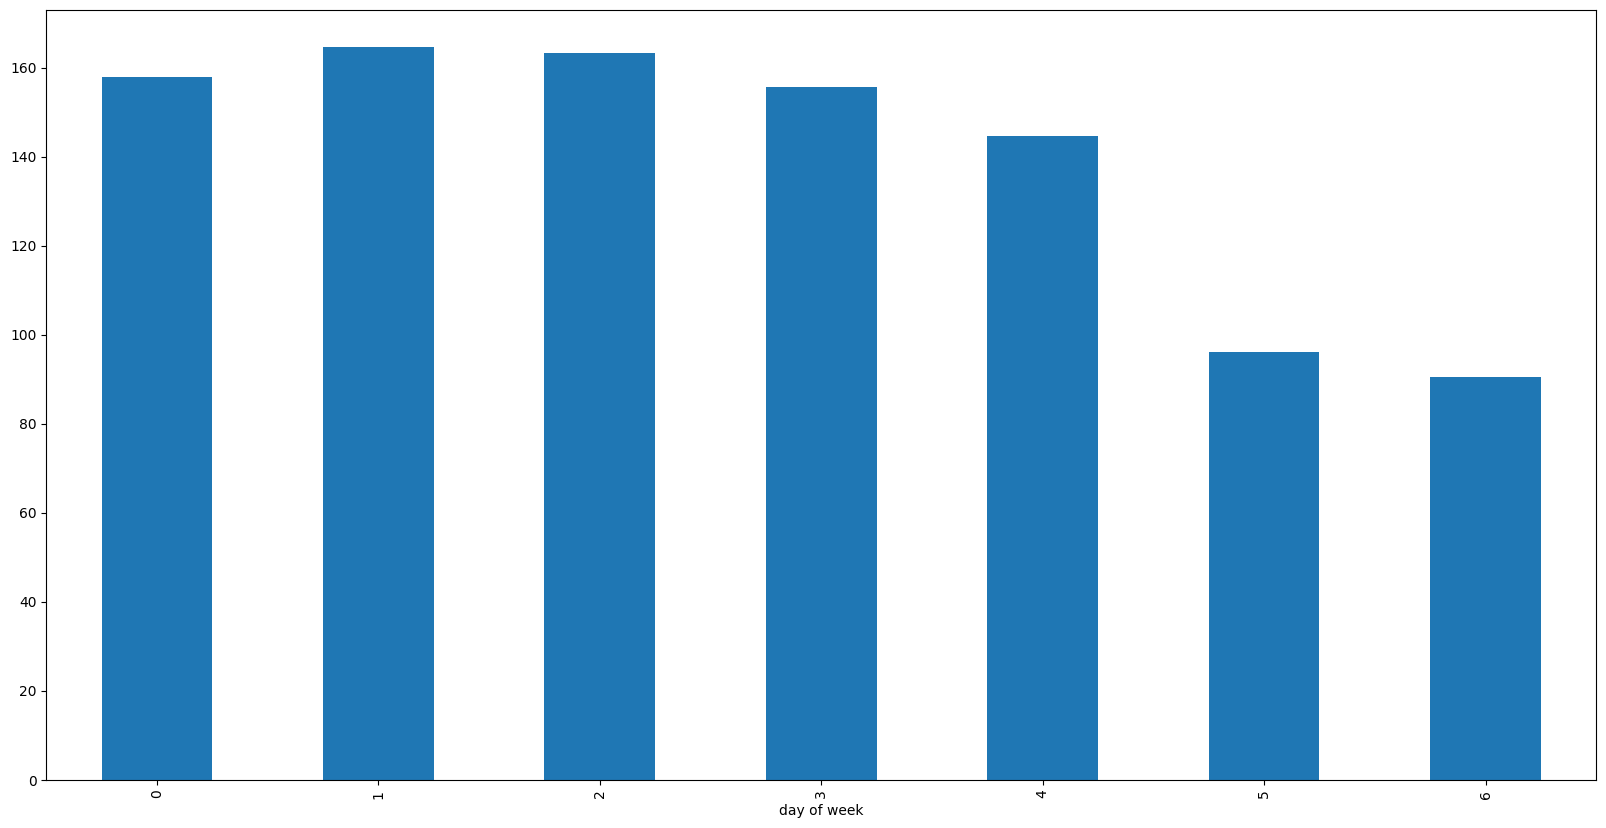

In [ ]:
# day wise passenger count
train.groupby("day of week")["Count"].mean().plot.bar();

In [ ]:
train.drop("ID",axis=1)

Datetime  Count  year  month  day  Hour  \
Datetime                                                                 
2012-08-25 00:00:00 2012-08-25 00:00:00      8  2012      8   25     0   
2012-08-25 01:00:00 2012-08-25 01:00:00      2  2012      8   25     1   
2012-08-25 02:00:00 2012-08-25 02:00:00      6  2012      8   25     2   
2012-08-25 03:00:00 2012-08-25 03:00:00      2  2012      8   25     3   
2012-08-25 04:00:00 2012-08-25 04:00:00      2  2012      8   25     4   
...                                 ...    ...   ...    ...  ...   ...   
2014-09-25 19:00:00 2014-09-25 19:00:00    868  2014      9   25    19   
2014-09-25 20:00:00 2014-09-25 20:00:00    732  2014      9   25    20   
2014-09-25 21:00:00 2014-09-25 21:00:00    702  2014      9   25    21   
2014-09-25 22:00:00 2014-09-25 22:00:00    580  2014      9   25    22   
2014-09-25 23:00:00 2014-09-25 23:00:00    534  2014      9   25    23   

                     day of week  weekend  
Datetime                                   
2012-08-25 00:00:00            5        1  
2012-08-25 01:00:00            5        1  
2012-08-25 02:00:00            5        1  
2012-08-25 03:00:00            5        1  
2012-08-25 04:00:00            5        1  
...                          ...      ...  
2014-09-25 19:00:00            3        0  
2014-09-25 20:00:00            3        0  
2014-09-25 21:00:00            3        0  
2014-09-25 22:00:00            3        0  
2014-09-25 23:00:00            3        0  

[18288 rows x 8 columns]

In [ ]:
train.Timestamp = pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
train.index = train.Timestamp
hourly = train.resample("H").mean()
daily = train.resample("D").mean()
weekly = train.resample("W").mean()
monthly = train.resample("M").mean()

In [ ]:
train.head()

ID            Datetime  Count  year  month  day  Hour  \
Datetime                                                                     
2012-08-25 00:00:00   0 2012-08-25 00:00:00      8  2012      8   25     0   
2012-08-25 01:00:00   1 2012-08-25 01:00:00      2  2012      8   25     1   
2012-08-25 02:00:00   2 2012-08-25 02:00:00      6  2012      8   25     2   
2012-08-25 03:00:00   3 2012-08-25 03:00:00      2  2012      8   25     3   
2012-08-25 04:00:00   4 2012-08-25 04:00:00      2  2012      8   25     4   

                     day of week  weekend  
Datetime                                   
2012-08-25 00:00:00            5        1  
2012-08-25 01:00:00            5        1  
2012-08-25 02:00:00            5        1  
2012-08-25 03:00:00            5        1  
2012-08-25 04:00:00            5        1

<Axes: title={'center': 'Monthly'}, xlabel='Datetime'>

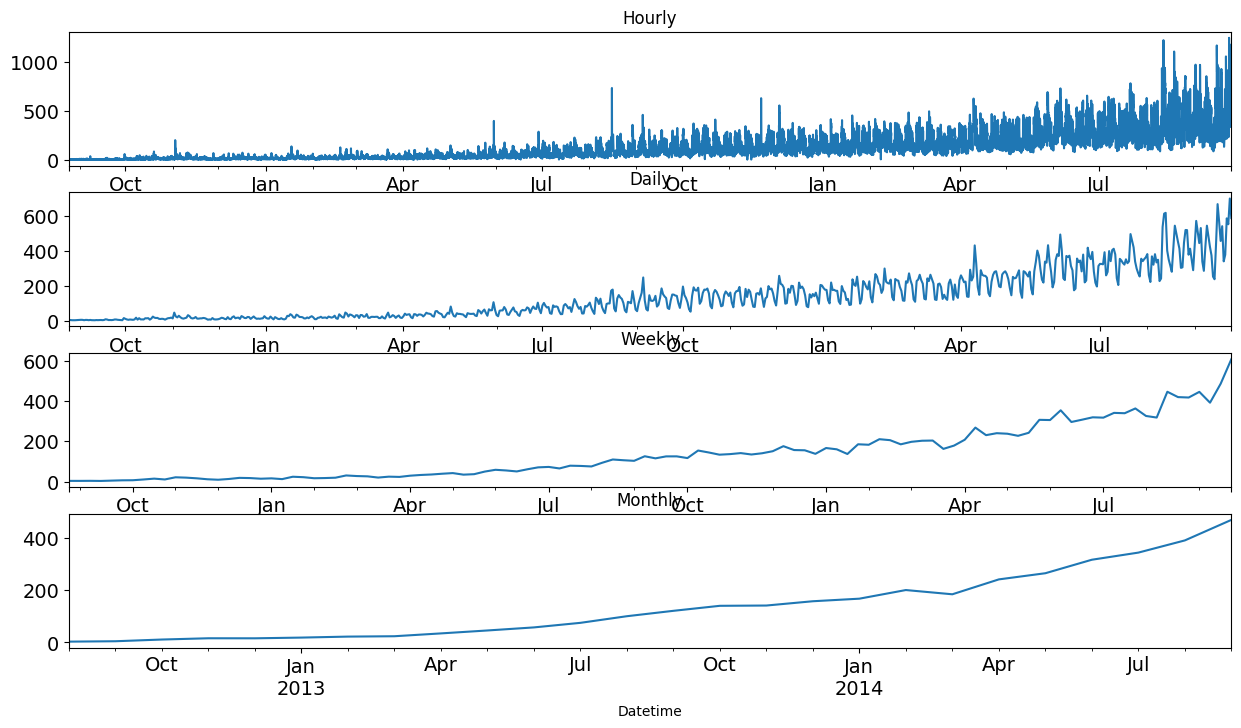

In [ ]:
# hourly,daily,weekly and monthly time series
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title="Hourly", fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(15,8), title="Daily", fontsize=14,ax=axs[1])
weekly.Count.plot(figsize=(15,8), title="Weekly", fontsize=14,ax=axs[2])
monthly.Count.plot(figsize=(15,8), title="Monthly", fontsize=14,ax=axs[3])

In [ ]:
#It would be difficult to convert the monthly and weekly predictions to hourly prediction
# so we will work on the daily time series
test.Timestamp = pd.to_datetime(test.Datetime, format="%d-%m-%Y %H:%M")
test.index = test.Timestamp
test = test.resample("D").mean()
train.Timestamp = pd.to_datetime(train.Datetime, format="%d-%m-%Y %H:%M")
train.index = train.Timestamp
train = train.resample("D").mean()

## Modeling Techniques and Evaluation

#### Splitting the data

In [ ]:
# Take last 3 months as the validation data and rest for training data
Train = train["2012-08-25":"2014-06-24"]
valid = train["2014-06-25":"2014-09-25"]

In [ ]:
Train.shape

(669, 9)

In [ ]:
valid.shape

(93, 9)

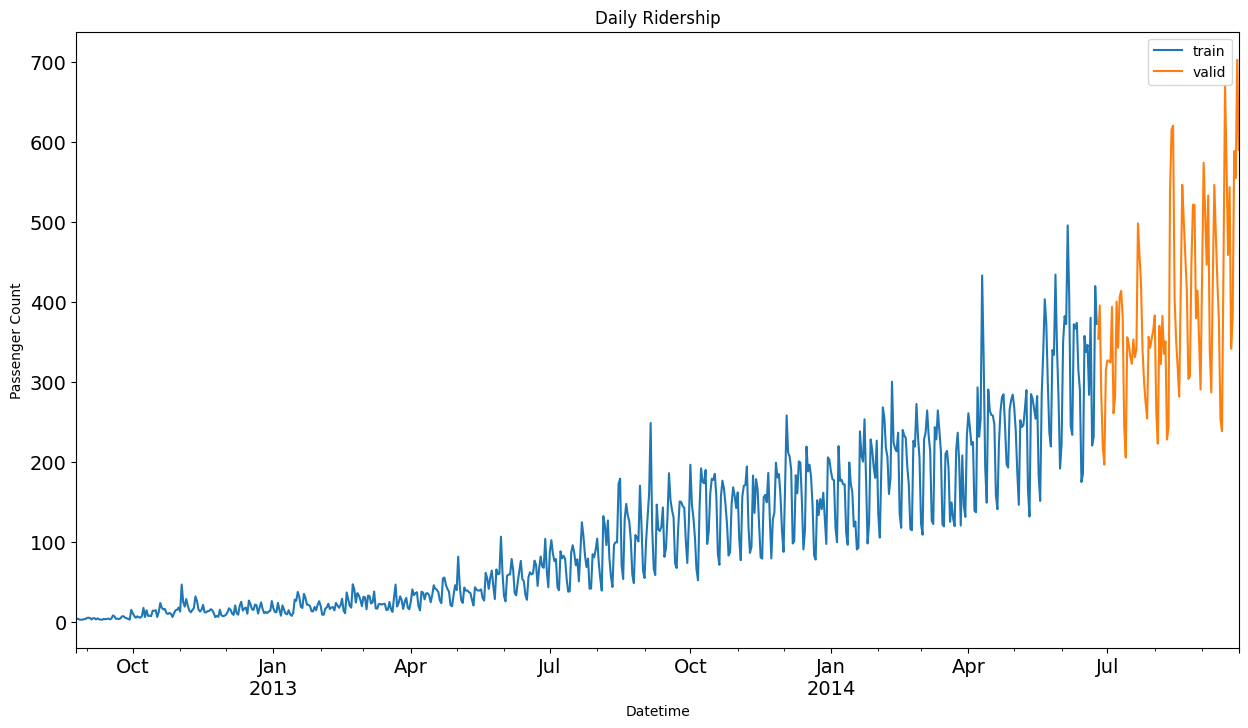

In [ ]:
Train.Count.plot(figsize=(15,8), title="Daily Ridership", fontsize=14, label="train")
valid.Count.plot(figsize=(15,8), title="Daily Ridership", fontsize=14, label="valid")
plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc="best")
plt.show()

#### Modelling Techniques


*   Naive approch
*   Moving average
*   Simple Exponential Smoothing
*   Holt's linear trend model



**Naive Approach**

In this forecasting technique, we assume that the next expected point is equal to the last observed point. Not suitable for datasets with high variabiility.

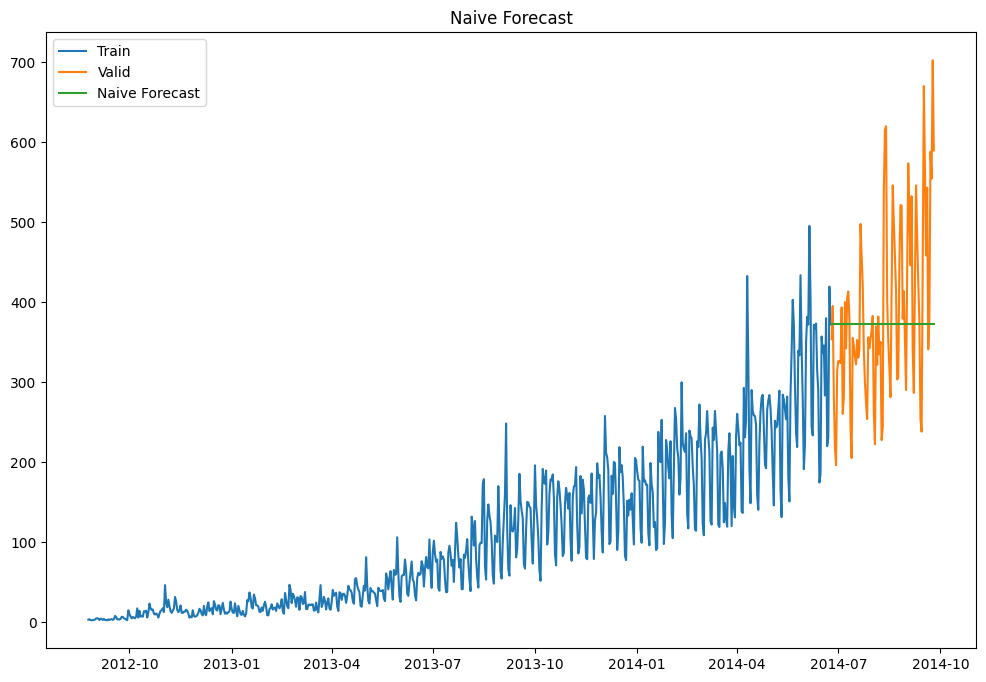

In [ ]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat["naive"] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train["Count"], label="Train")
plt.plot(valid.index, valid["Count"], label="Valid")
plt.plot(y_hat.index,y_hat["naive"], label="Naive Forecast")
plt.legend(loc="best")
plt.title("Naive Forecast")
plt.show()

In [ ]:
# Calculate RMSE to check the accuracy of our model on validation data set
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


**Moving average**

Take the average of the passenger counts for last few time periods only. Predictions are getting weaker as we increase the number of observations.

**Simple Exponential Smoothing**

Assign larger weights to more recent observations than to observations from the distant past. The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

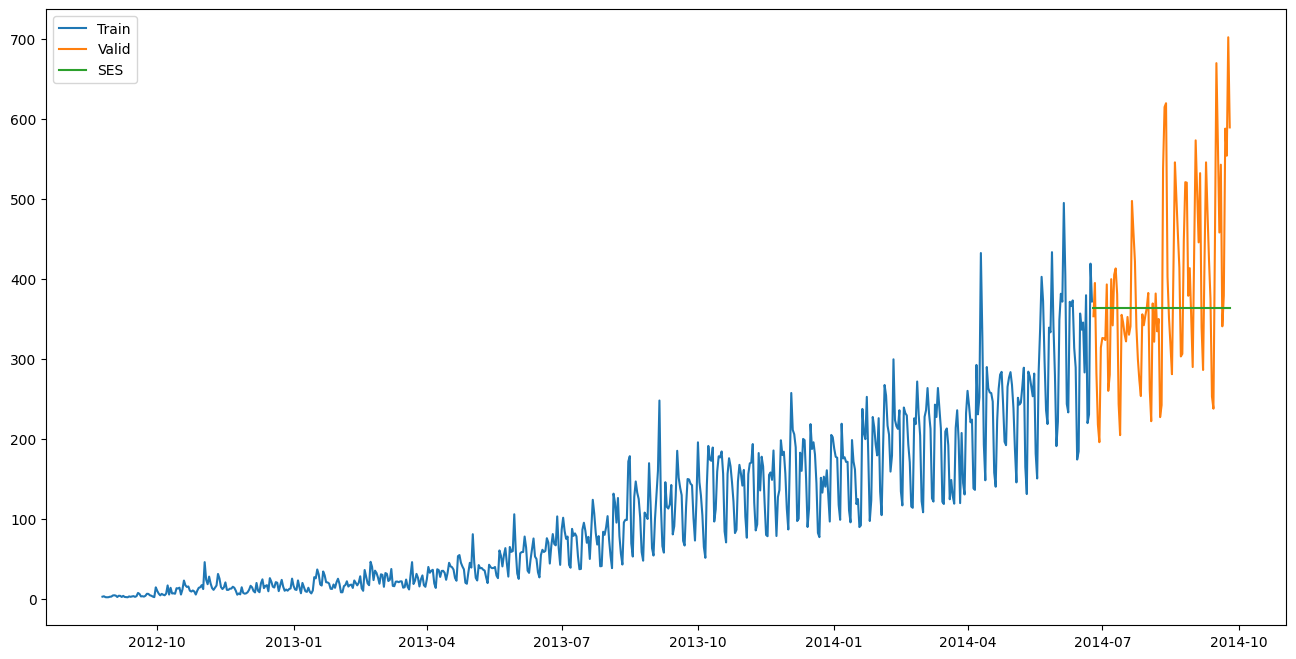

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train["Count"])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg["SES"] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="Valid")
plt.plot(y_hat_avg["SES"], label="SES")
plt.legend(loc="best")
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
rms

113.43708111884514

**Holt's Linear Trend Model**

An extension of simple exponential smoothing to allow forecasting of data with a trend. The forecasting function in this method is a function of level and trend.

First of all let us the trend, seasonality and error in the series.


We can decompose the time series in four parts:


1.   Observed
2.   Trend
3.  Seasonal
4.  Residual



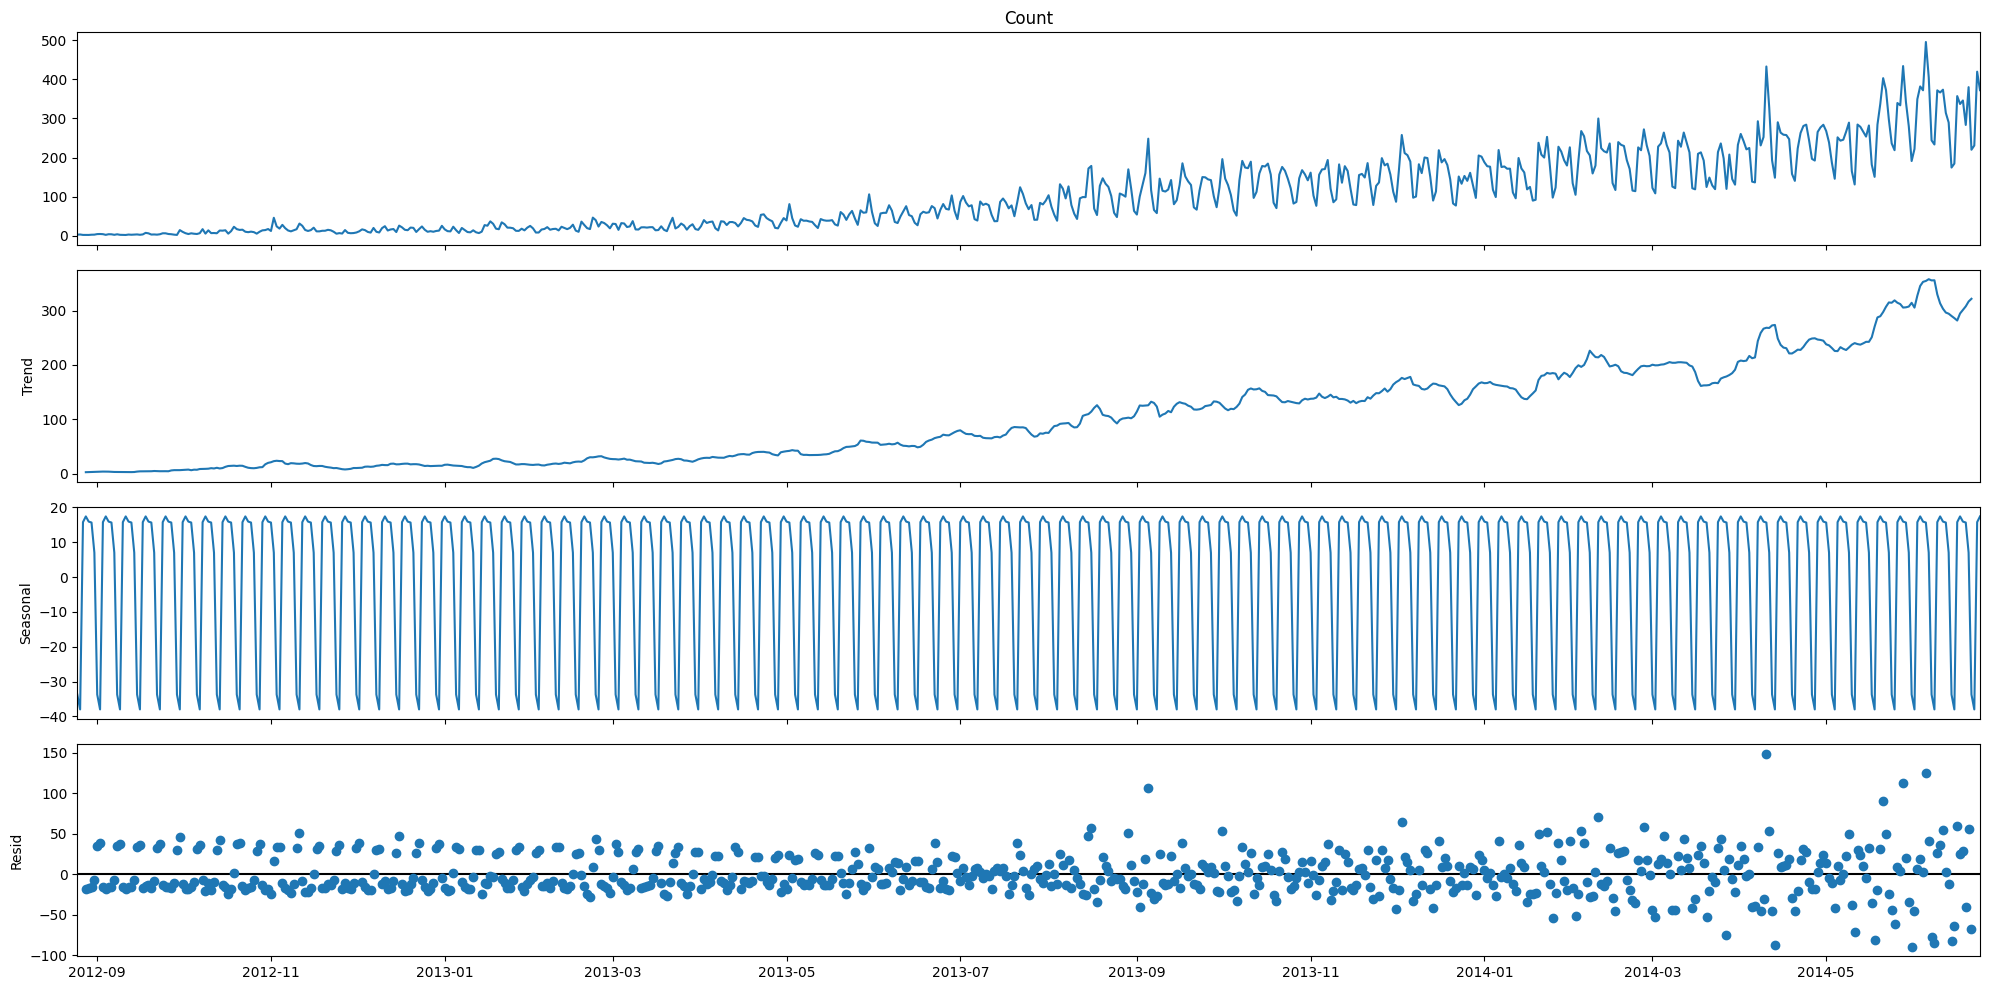

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

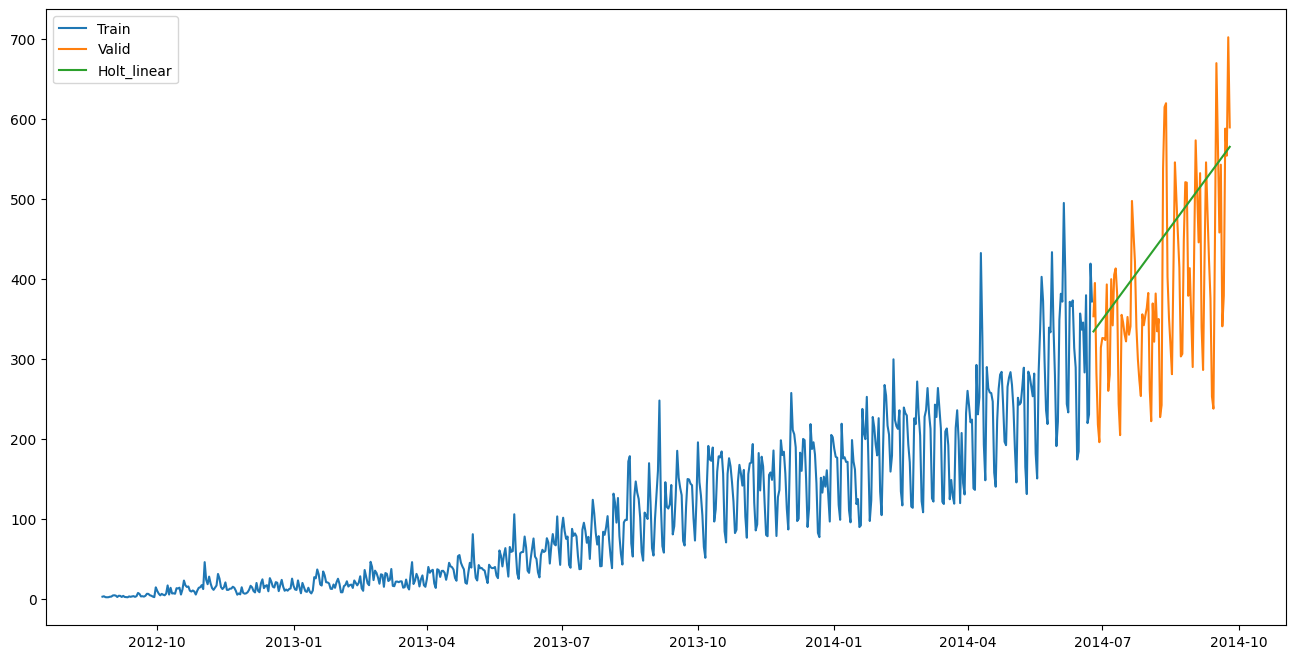

In [ ]:
# Increasing trend can be seen in the dataset, so make a model based on the trend
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train["Count"])).fit(smoothing_level=0.3,smoothing_slope=0.1)
y_hat_avg["Holt_linear"] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="Valid")
plt.plot(y_hat_avg["Holt_linear"], label="Holt_linear")
plt.legend(loc="best")
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
rms

112.94278345314041

#### Holt's Linear Trend Model on daily time series

In [ ]:
submission = pd.read_csv("ss.csv")
predict = fit1.forecast(len(test))

In [ ]:
test["prediction"] = predict

**Note** Remember this is the daily predictions. We have to convert these predictions to hourly basis.
*   Calculate the ratio of passenger count for each hour every day.
*   Find the average ratio of passenger count for every hour and we will get 24 ratios.
*   Calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [ ]:
# hourly ratio of count
train_original["ratio"] = train_original["Count"]/train_original["Count"].sum()

In [ ]:
train_original.head()

ID            Datetime  Count  year  month  day  Hour         ratio
0   0 2012-08-25 00:00:00      8  2012      8   25     0  3.148037e-06
1   1 2012-08-25 01:00:00      2  2012      8   25     1  7.870093e-07
2   2 2012-08-25 02:00:00      6  2012      8   25     2  2.361028e-06
3   3 2012-08-25 03:00:00      2  2012      8   25     3  7.870093e-07
4   4 2012-08-25 04:00:00      2  2012      8   25     4  7.870093e-07

In [ ]:
# group the hourly ratio
temp = train_original.groupby(["Hour"])["ratio"].sum()

In [ ]:
pd.DataFrame(temp, columns=["Hour","ratio"]).to_csv("GROUPby.csv")

In [ ]:
temp2 = pd.read_csv("GROUPby.csv")


In [ ]:
temp2.head()

Hour  Hour.1     ratio
0     0     NaN  0.044287
1     1     NaN  0.035343
2     2     NaN  0.029911
3     3     NaN  0.024714
4     4     NaN  0.020802

In [ ]:
temp2 = temp2.drop("Hour.1",axis=1)

In [ ]:
# Merge test and test_original on day, month and year
merge = pd.merge(test, test_original, on=("day","month","year"), how="left")

In [ ]:
merge["Hour"] = merge["Hour_y"]

In [ ]:
merge.head()

ID_x          Datetime_x    year  month   day  Hour_x  prediction  \
0  18299.5 2014-09-26 11:30:00  2014.0    9.0  26.0    11.5  334.650767   
1  18299.5 2014-09-26 11:30:00  2014.0    9.0  26.0    11.5  334.650767   
2  18299.5 2014-09-26 11:30:00  2014.0    9.0  26.0    11.5  334.650767   
3  18299.5 2014-09-26 11:30:00  2014.0    9.0  26.0    11.5  334.650767   
4  18299.5 2014-09-26 11:30:00  2014.0    9.0  26.0    11.5  334.650767   

    ID_y          Datetime_y  Hour_y  Hour  
0  18288 2014-09-26 00:00:00       0     0  
1  18289 2014-09-26 01:00:00       1     1  
2  18290 2014-09-26 02:00:00       2     2  
3  18291 2014-09-26 03:00:00       3     3  
4  18292 2014-09-26 04:00:00       4     4

In [ ]:
merge = merge.drop(["year","month","Hour_x","Hour_y"], axis=1)

In [ ]:
merge.head()

ID_x          Datetime_x   day  prediction   ID_y          Datetime_y  \
0  18299.5 2014-09-26 11:30:00  26.0  334.650767  18288 2014-09-26 00:00:00   
1  18299.5 2014-09-26 11:30:00  26.0  334.650767  18289 2014-09-26 01:00:00   
2  18299.5 2014-09-26 11:30:00  26.0  334.650767  18290 2014-09-26 02:00:00   
3  18299.5 2014-09-26 11:30:00  26.0  334.650767  18291 2014-09-26 03:00:00   
4  18299.5 2014-09-26 11:30:00  26.0  334.650767  18292 2014-09-26 04:00:00   

   Hour  
0     0  
1     1  
2     2  
3     3  
4     4

In [ ]:
prediction=pd.merge(merge, temp2, on="Hour", how="left")

In [ ]:
#Converting the ratio to the original scale
prediction["Count"] = prediction["prediction"]*prediction["ratio"]*24

In [ ]:
prediction.head()

ID_x          Datetime_x   day  prediction   ID_y          Datetime_y  \
0  18299.5 2014-09-26 11:30:00  26.0  334.650767  18288 2014-09-26 00:00:00   
1  18299.5 2014-09-26 11:30:00  26.0  334.650767  18289 2014-09-26 01:00:00   
2  18299.5 2014-09-26 11:30:00  26.0  334.650767  18290 2014-09-26 02:00:00   
3  18299.5 2014-09-26 11:30:00  26.0  334.650767  18291 2014-09-26 03:00:00   
4  18299.5 2014-09-26 11:30:00  26.0  334.650767  18292 2014-09-26 04:00:00   

   Hour     ratio       Count  
0     0  0.044287  355.692974  
1     1  0.035343  283.861602  
2     2  0.029911  240.234347  
3     3  0.024714  198.497058  
4     4  0.020802  167.075574

In [ ]:
prediction["ID"] = prediction["ID_y"]

In [ ]:
# Drop all the other features from submission file and keep Id and count only
submission = prediction.drop(["ID_x","day","ID_y","prediction","Hour","ratio"],axis=1)
pd.DataFrame(submission, columns=["ID","Count"]).to_csv("Holt_linear.csv")

#### Holt winter's model on daily time series

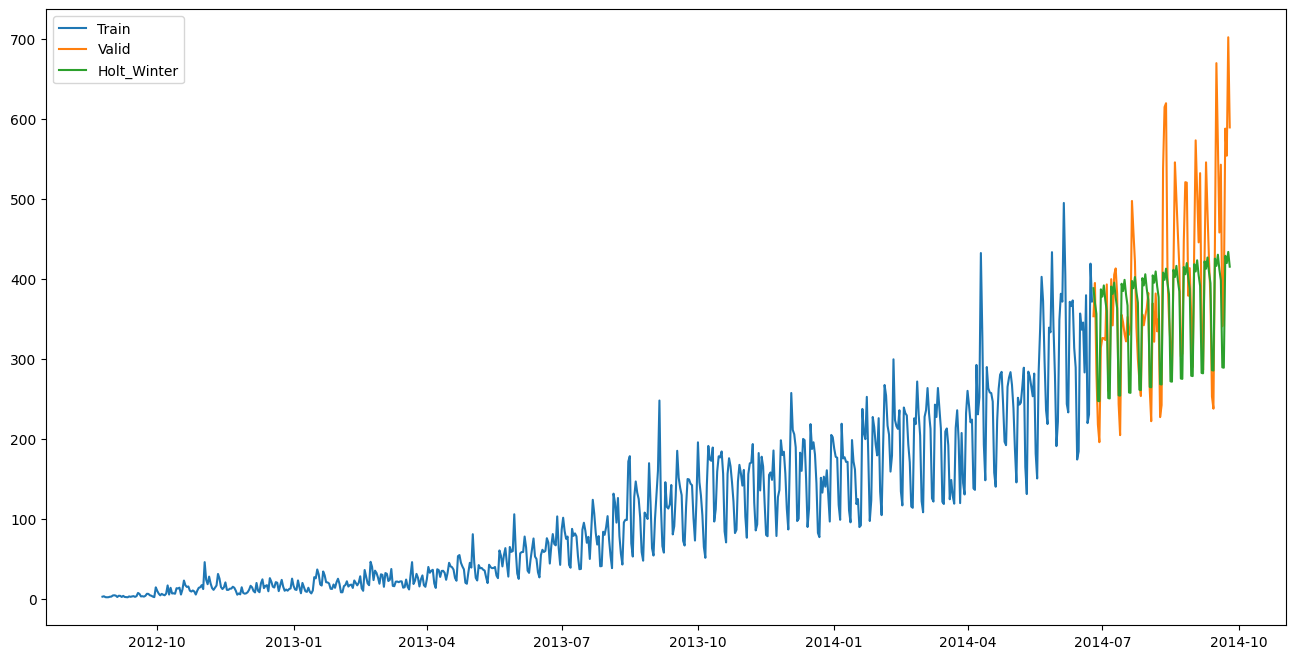

In [ ]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train["Count"]), seasonal_periods=7, trend="add", seasonal="add").fit()
y_hat_avg["Holt_Winter"] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="Valid")
plt.plot(y_hat_avg["Holt_Winter"], label="Holt_Winter")
plt.legend(loc="best")
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
rms

81.94569995693239

In [ ]:
# forecast the Counts for entire test dataset
predict = fit1.forecast(len(test))
test["prediction"]=predict

In [ ]:
#merge test and test_original
merge = pd.merge(test, test_original, on=("day","month","year"), how="left")
merge["Hour"] = merge["Hour_y"]
merge = merge.drop(["year","month","Hour_x","Hour_y"],axis=1)

In [ ]:
merge.head()

ID_x          Datetime_x   day  prediction   ID_y          Datetime_y  \
0  18299.5 2014-09-26 11:30:00  26.0  388.682012  18288 2014-09-26 00:00:00   
1  18299.5 2014-09-26 11:30:00  26.0  388.682012  18289 2014-09-26 01:00:00   
2  18299.5 2014-09-26 11:30:00  26.0  388.682012  18290 2014-09-26 02:00:00   
3  18299.5 2014-09-26 11:30:00  26.0  388.682012  18291 2014-09-26 03:00:00   
4  18299.5 2014-09-26 11:30:00  26.0  388.682012  18292 2014-09-26 04:00:00   

   Hour  
0     0  
1     1  
2     2  
3     3  
4     4

In [ ]:
prediction=pd.merge(merge,temp2,on="Hour",how="left")
prediction["Count"]=prediction["prediction"]*prediction["ratio"]*24

In [ ]:
prediction["ID"]=prediction["ID_y"]
# Drop all the other features from submission file and keep Id and count only
submission = prediction.drop(["ID_x","day","ID_y","prediction","Hour","ratio"],axis=1)
pd.DataFrame(submission, columns=["ID","Count"]).to_csv("Holt_winter.csv")

#### ARIMA
Cant we make a model which will consider both the trend and seasonality of the time series?

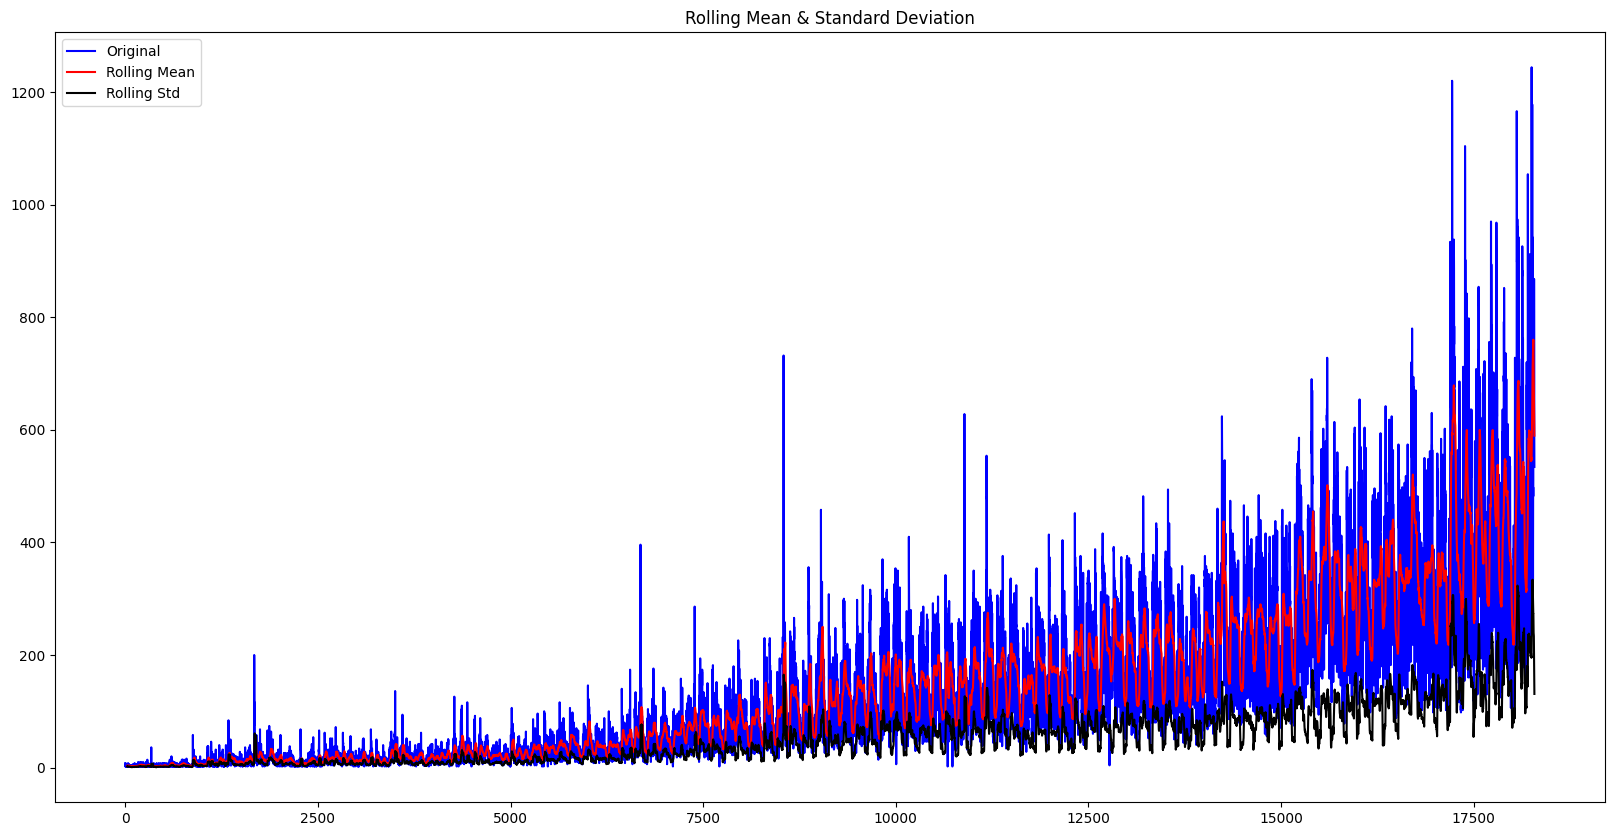

Result of Dicker-Fuller Test:
Test Statistic                   -4.456561
p-value                           0.000235
#Lags Used                       45.000000
Number of Observation Used    18242.000000
Critical Value (1%)              -3.430709
Critical Value (5%)              -2.861698
Critical Value (10%)             -2.566854
dtype: float64


In [ ]:
from matplotlib.pylab import rcParams
#make a func which we can use to calculate the results of dickey-fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(train_original):
    rolmean = train_original.rolling(24).mean()
    rolstd = train_original.rolling(24).std()
    # Plot
    orig = plt.plot(train_original, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)
    # Perform Dicker-Fuller test
    print("Result of Dicker-Fuller Test:")
    dftest = adfuller(train_original, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observation Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key ] = value
    print(dfoutput)
rcParams["figure.figsize"] = 20,10
test_stationarity(train_original["Count"])

The statistics shows that the time series is stationary as Test s< critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from data.


#### Removing trend

*   We will take rolling average here to remove the trend. Take the window size of 24 based on the fact that each day has 24 hours.

In [ ]:
Train["Count"]

Datetime
2012-08-25      3.166667
2012-08-26      3.666667
2012-08-27      2.583333
2012-08-28      2.416667
2012-08-29      2.500000
                 ...    
2014-06-20    379.916667
2014-06-21    220.083333
2014-06-22    230.833333
2014-06-23    419.416667
2014-06-24    372.166667
Freq: D, Name: Count, Length: 669, dtype: float64

In [ ]:
Train_log

Datetime
2012-08-25    1.152680
2012-08-26    1.299283
2012-08-27    0.949081
2012-08-28    0.882389
2012-08-29    0.916291
                ...   
2014-06-20    5.939952
2014-06-21    5.394006
2014-06-22    5.441696
2014-06-23    6.038865
2014-06-24    5.919342
Freq: D, Name: Count, Length: 669, dtype: float64

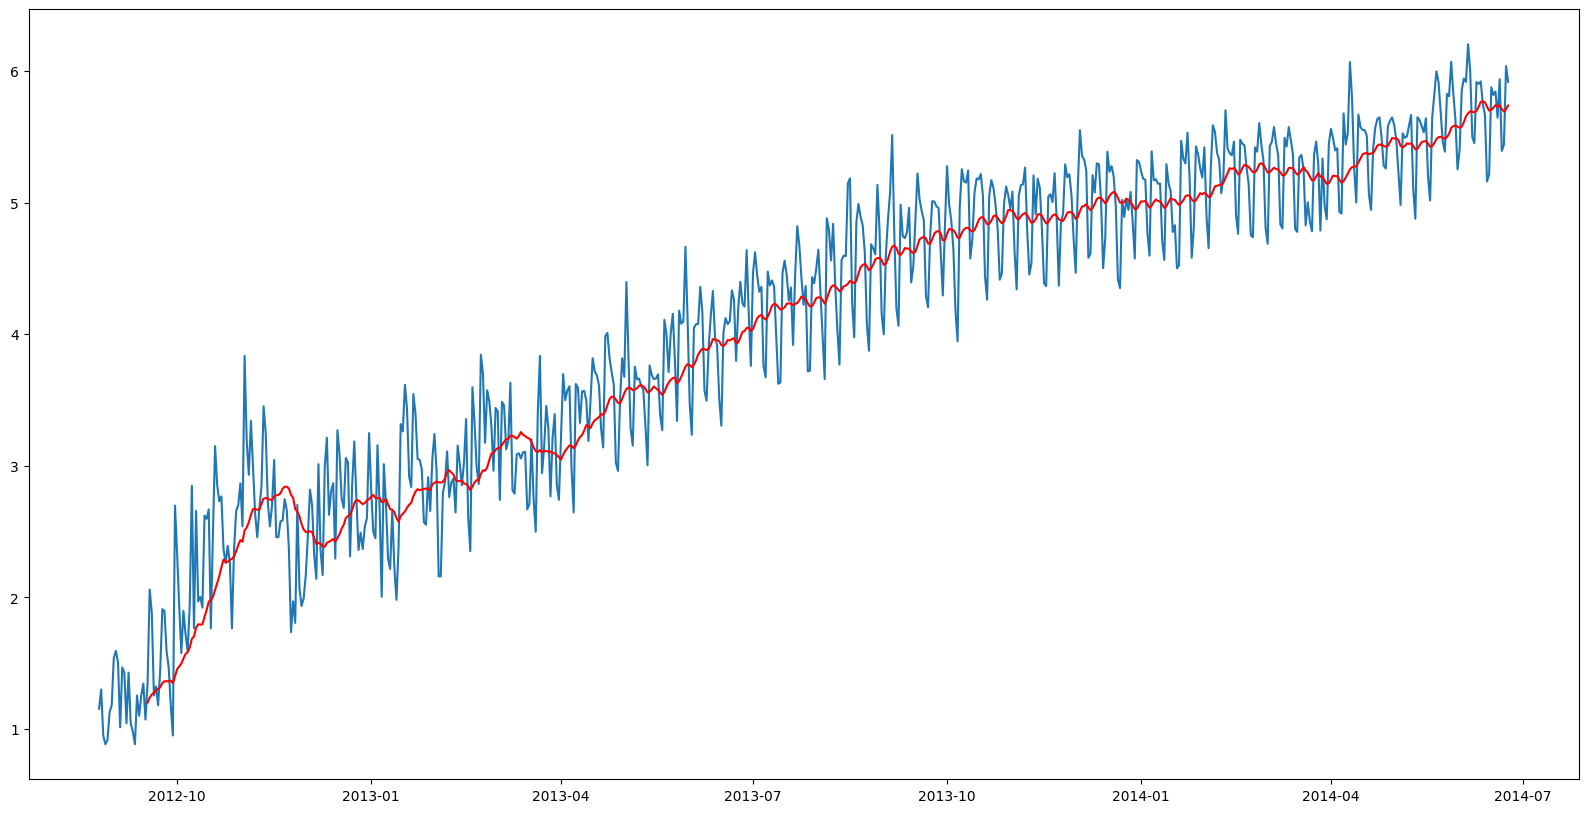

In [ ]:
Train_log = np.log(Train["Count"])
valid_log = np.log(valid["Count"])
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color="red")
plt.show()

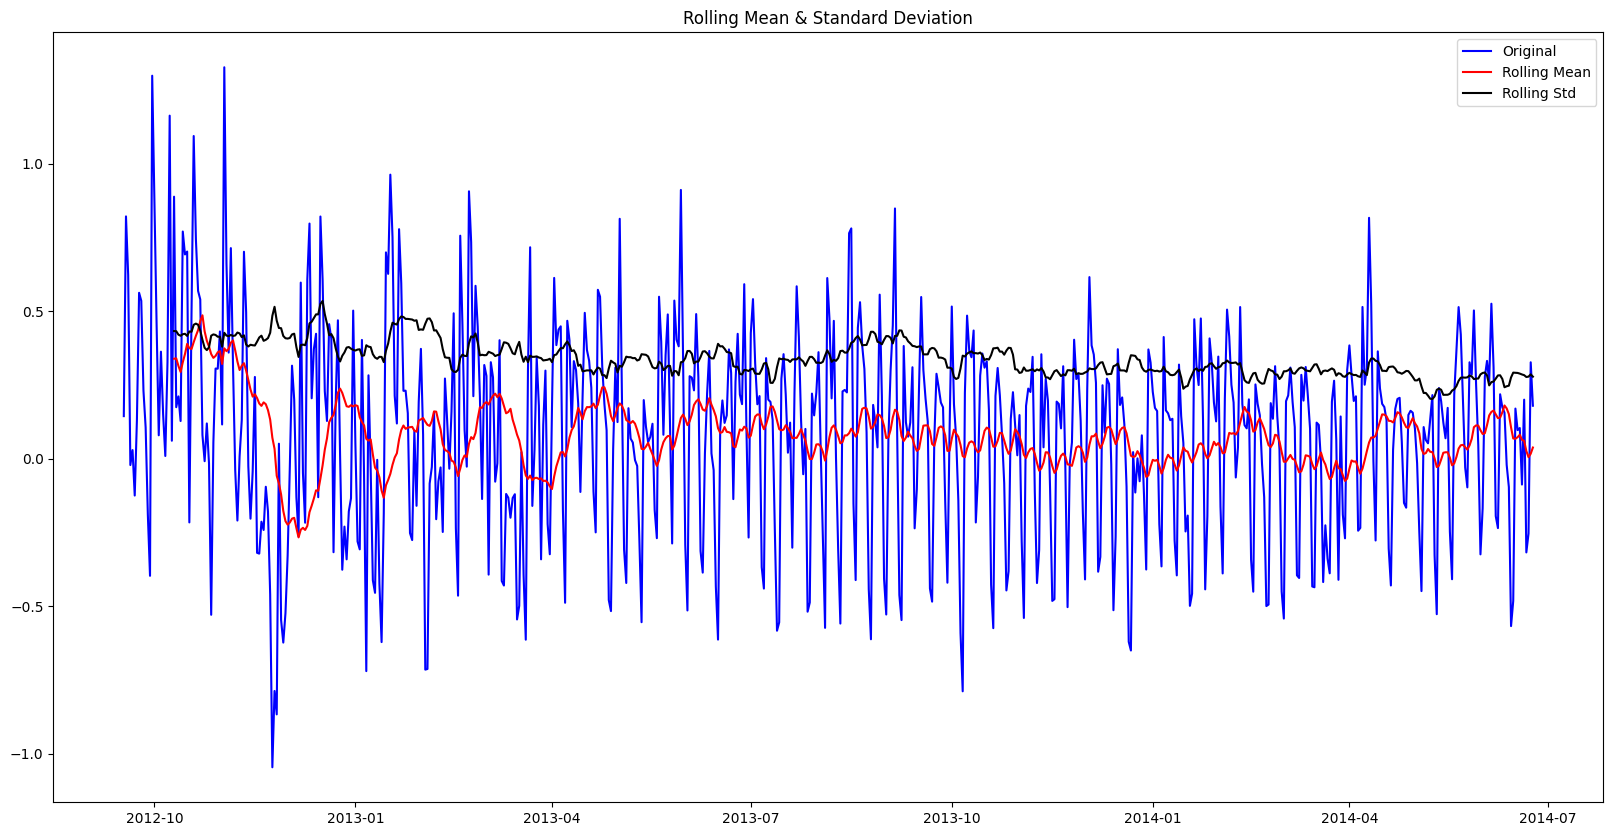

Result of Dicker-Fuller Test:
Test Statistic               -5.861646e+00
p-value                       3.399422e-07
#Lags Used                    2.000000e+01
Number of Observation Used    6.250000e+02
Critical Value (1%)          -3.440856e+00
Critical Value (5%)          -2.866175e+00
Critical Value (10%)         -2.569239e+00
dtype: float64


In [ ]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

We can see that the test statistic is very smaller as compared to the critical value. So, we can be confident that the trend is almost removed.
*   Now stabilize the mean of the time series which also a requirement for a stationary time series.

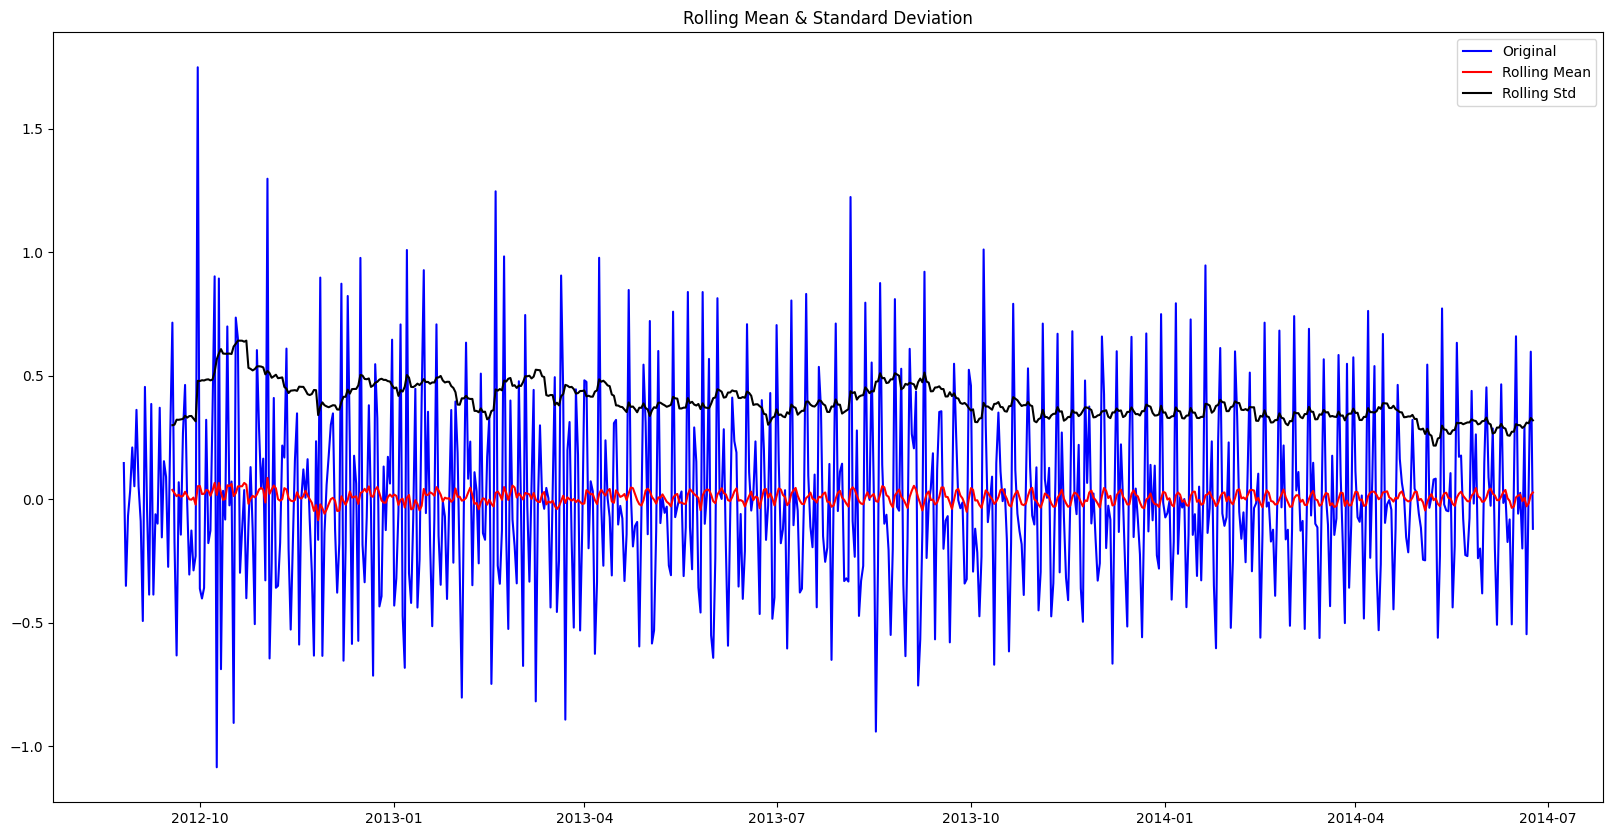

Result of Dicker-Fuller Test:
Test Statistic               -8.237568e+00
p-value                       5.834049e-13
#Lags Used                    1.900000e+01
Number of Observation Used    6.480000e+02
Critical Value (1%)          -3.440482e+00
Critical Value (5%)          -2.866011e+00
Critical Value (10%)         -2.569151e+00
dtype: float64


In [ ]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

#### Removing Seasonality
*   we will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

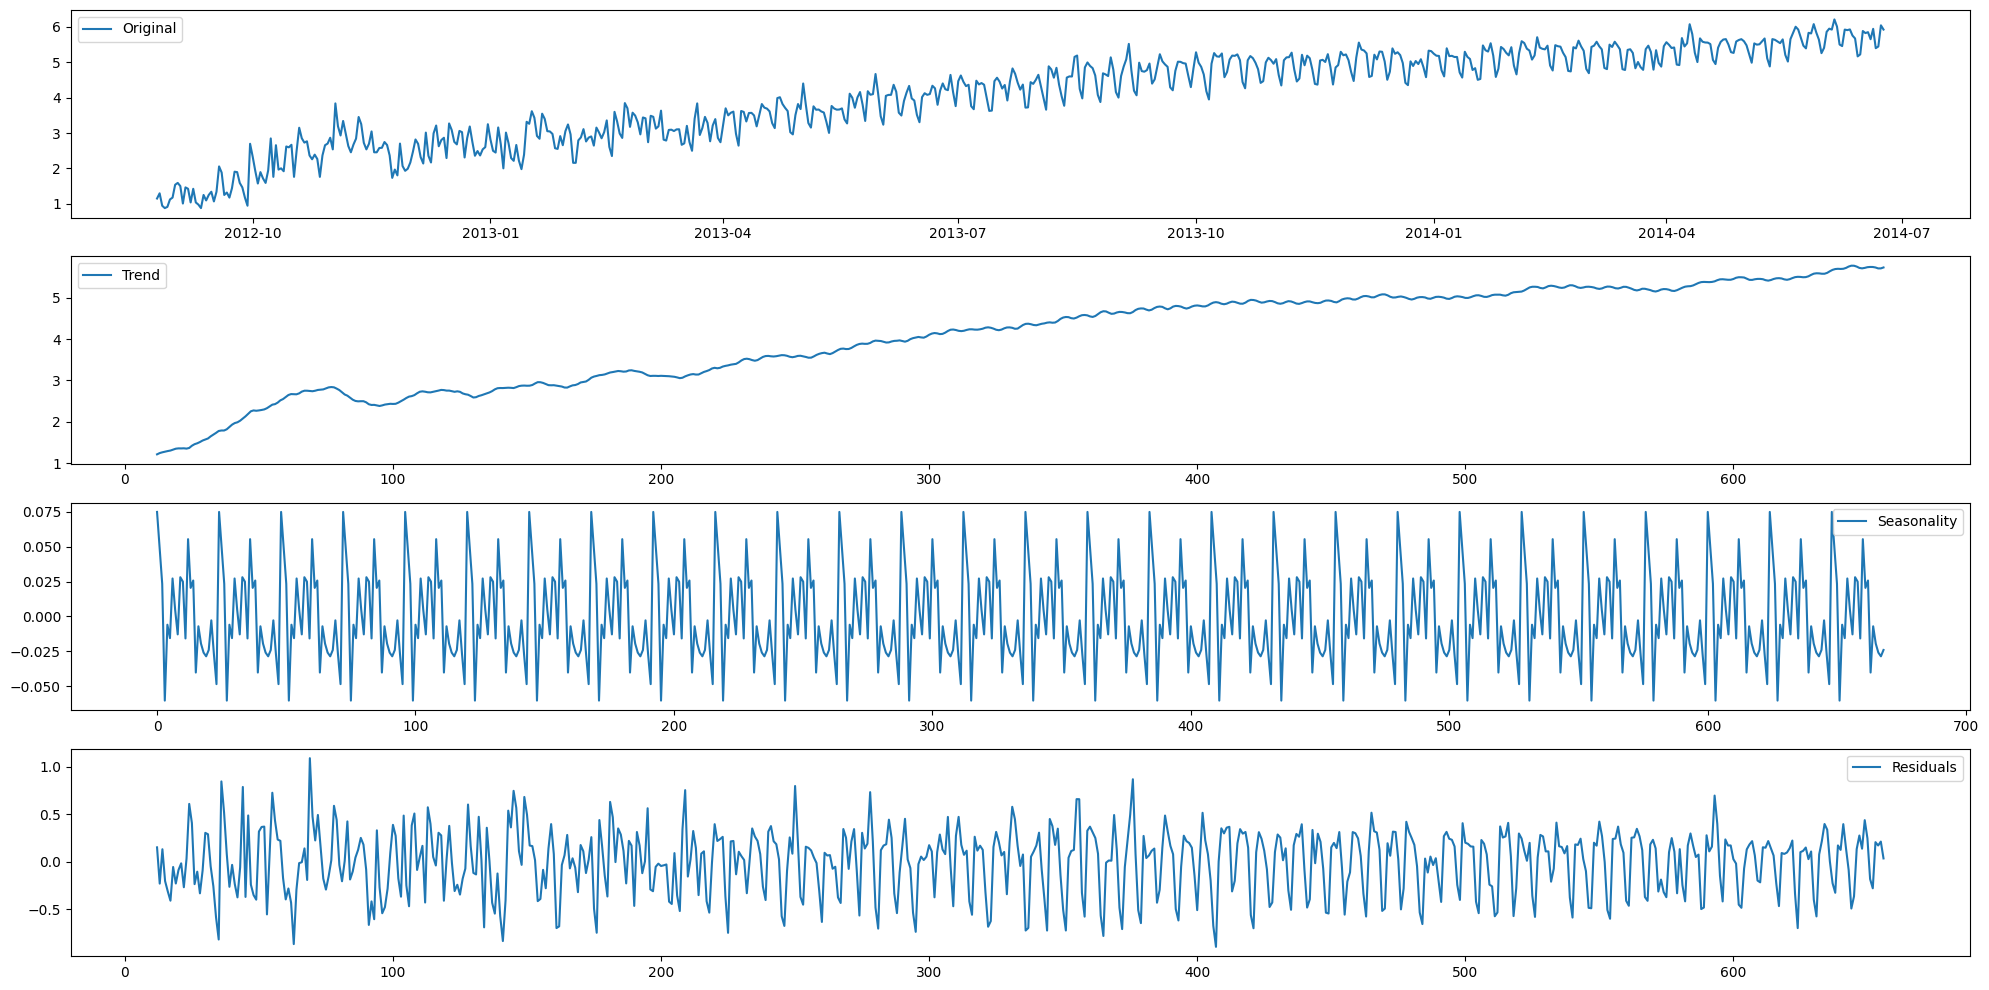

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label="Residuals")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

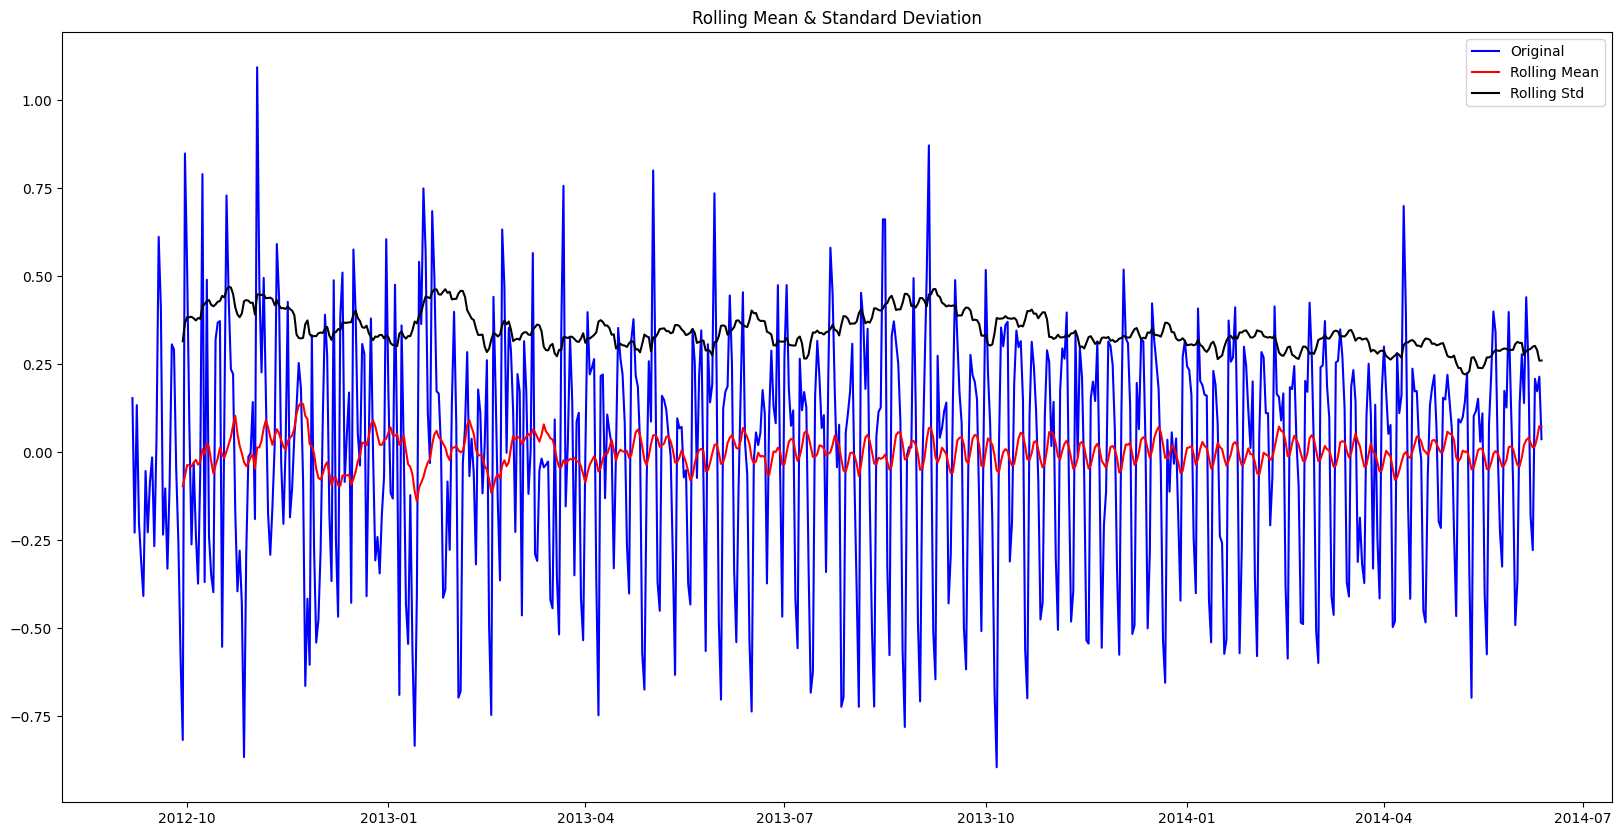

Result of Dicker-Fuller Test:
Test Statistic               -7.822096e+00
p-value                       6.628321e-12
#Lags Used                    2.000000e+01
Number of Observation Used    6.240000e+02
Critical Value (1%)          -3.440873e+00
Critical Value (5%)          -2.866183e+00
Critical Value (10%)         -2.569243e+00
dtype: float64


In [ ]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose["date"] = Train_log.index
train_log_decompose.set_index("date",inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

It can be interpreted from the results that the residuals are stationary.

#### Forecasting the time series using ARIMA
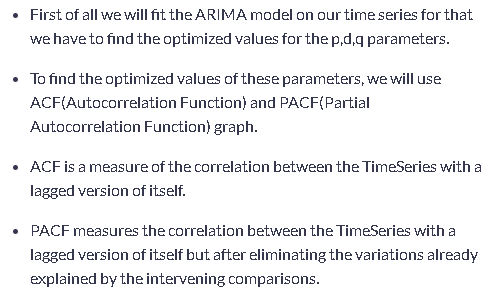

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method="ols")

#### ACF and PACF plot

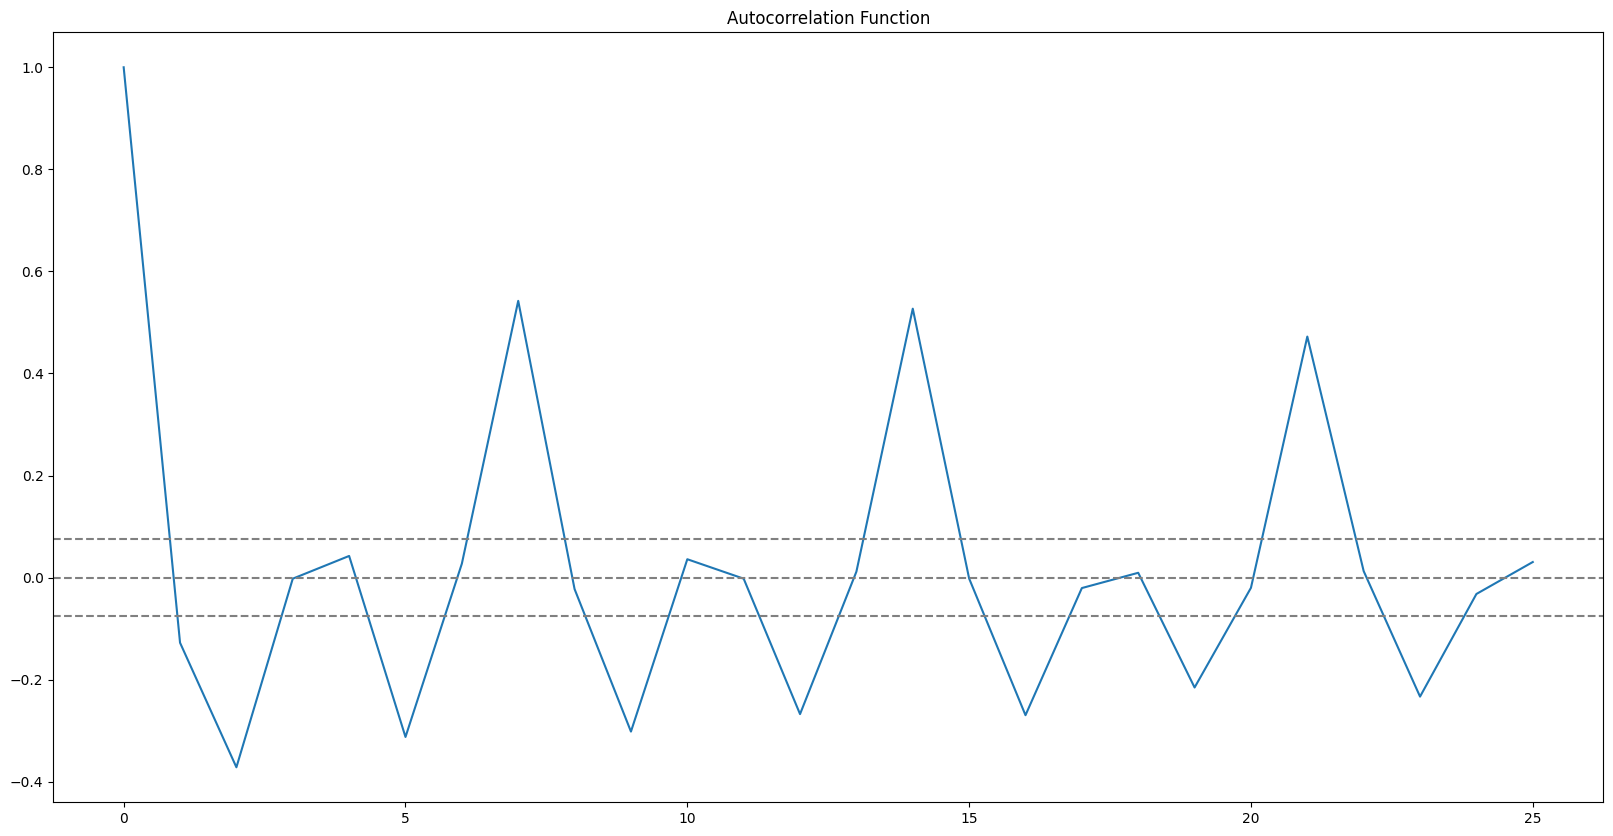

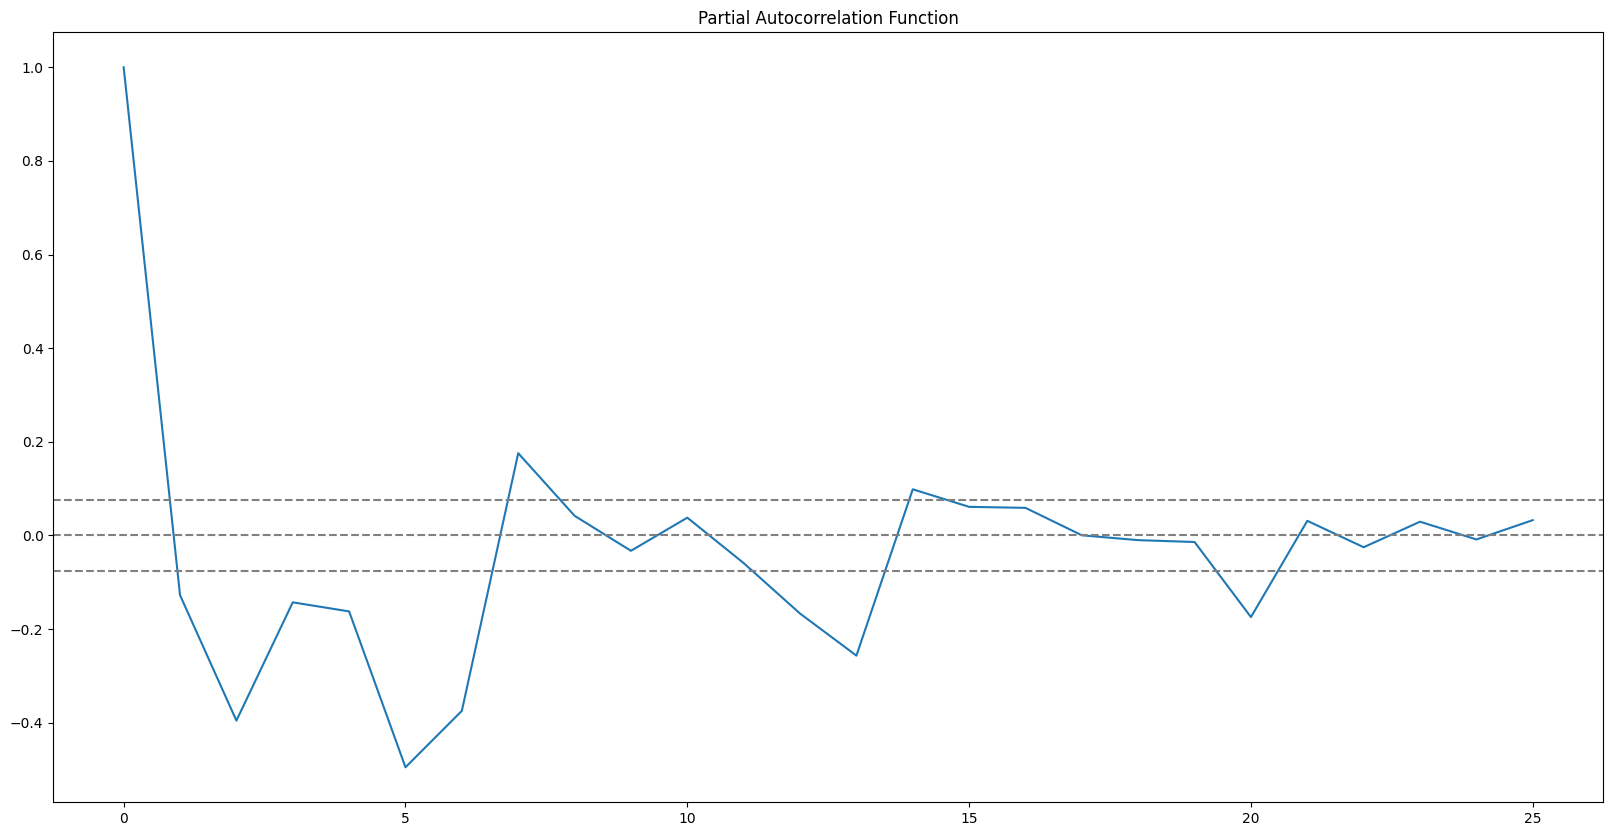

In [ ]:
# 1.96 is the 95% prediction interval
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle="--",color="gray")
plt.title("Autocorrelation Function")
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle="--",color="gray")
plt.title("Partial Autocorrelation Function")
plt.show()

p = 2, q = 2

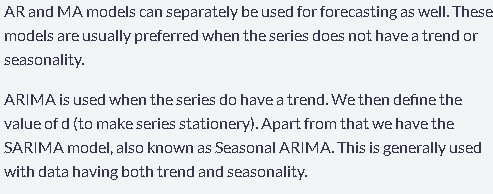

#### AR model
Autoregressive model specifies that the output variable depends linearly on its own previous values.

In [ ]:
Train_log

Datetime
2012-08-25    1.152680
2012-08-26    1.299283
2012-08-27    0.949081
2012-08-28    0.882389
2012-08-29    0.916291
                ...   
2014-06-20    5.939952
2014-06-21    5.394006
2014-06-22    5.441696
2014-06-23    6.038865
2014-06-24    5.919342
Freq: D, Name: Count, Length: 669, dtype: float64

In [ ]:
train_log_diff

Datetime
2012-08-25         NaN
2012-08-26    0.146603
2012-08-27   -0.350202
2012-08-28   -0.066691
2012-08-29    0.033902
                ...   
2014-06-20    0.293034
2014-06-21   -0.545946
2014-06-22    0.047690
2014-06-23    0.597169
2014-06-24   -0.119523
Freq: D, Name: Count, Length: 669, dtype: float64

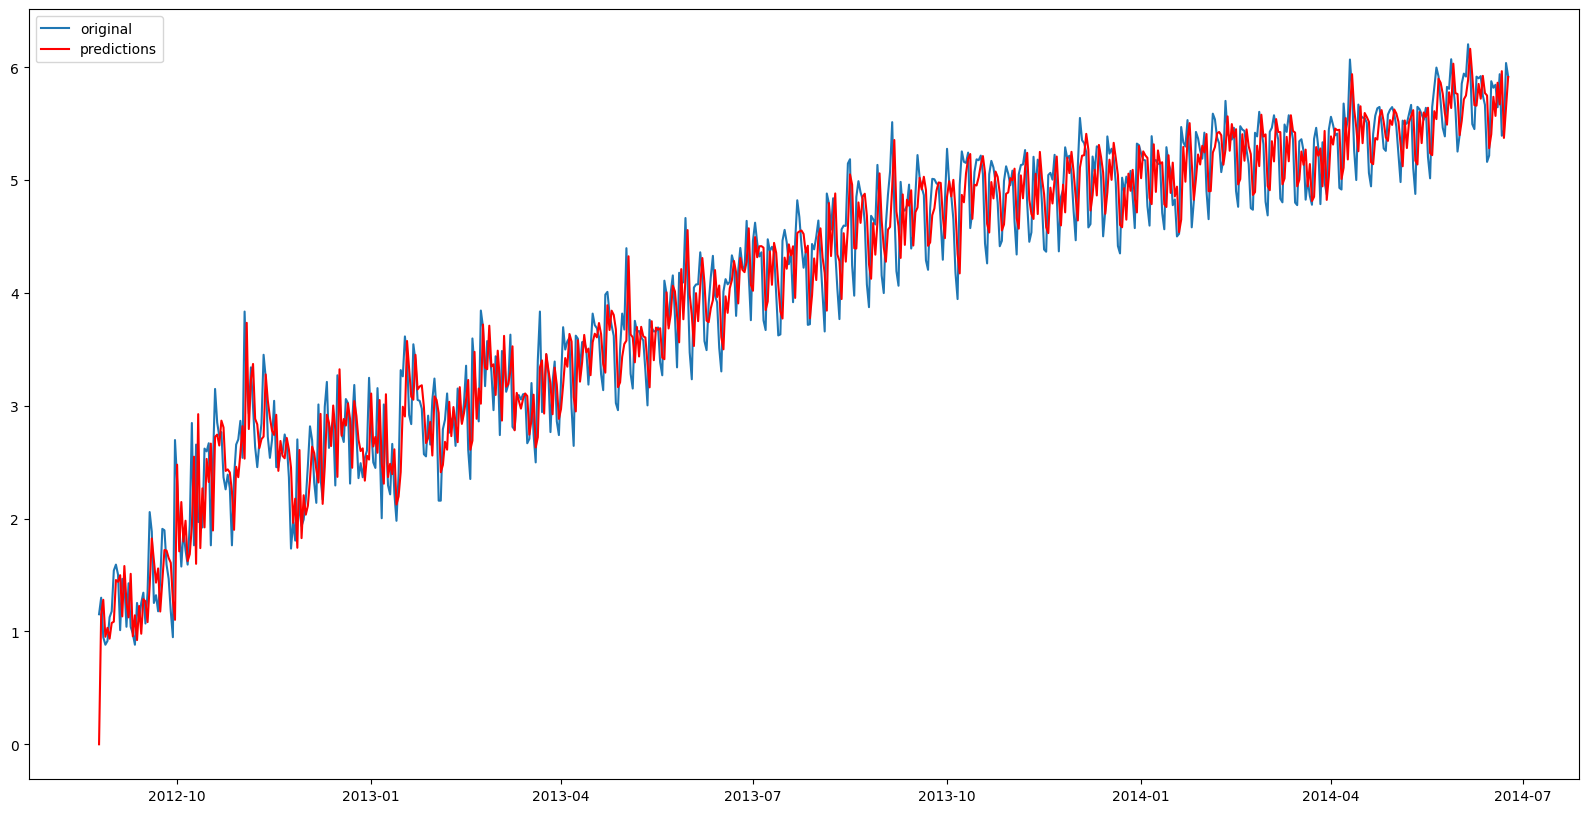

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# q=0 since it is just ar model
model = ARIMA(Train_log, order=(2,1,0))
result_AR = model.fit()
plt.plot(Train_log.dropna(), label="original")
plt.plot(result_AR.fittedvalues, color="red", label="predictions")
plt.legend(loc="best")
plt.show()

**Lets plot the validation curve for AR model**

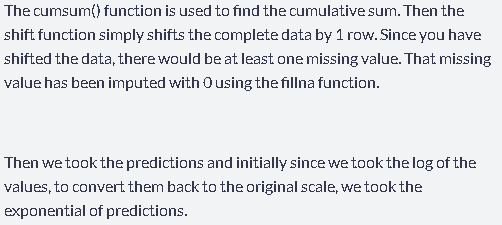

2014-06-25    5.705046
2014-06-26    5.790034
2014-06-27    5.859495
2014-06-28    5.813717
2014-06-29    5.794423
                ...   
2014-09-21    5.812923
2014-09-22    5.812923
2014-09-23    5.812923
2014-09-24    5.812923
2014-09-25    5.812923
Freq: D, Name: predicted_mean, Length: 93, dtype: float64
2014-06-25      0.000000
2014-06-26      5.705046
2014-06-27     11.495080
2014-06-28     17.354575
2014-06-29     23.168292
                 ...    
2014-09-21    511.441855
2014-09-22    517.254778
2014-09-23    523.067701
2014-09-24    528.880624
2014-09-25    534.693547
Freq: D, Name: predicted_mean, Length: 93, dtype: float64
Datetime
2014-06-25    5.868355
2014-06-26    5.868355
2014-06-27    5.868355
2014-06-28    5.868355
2014-06-29    5.868355
                ...   
2014-09-21    5.868355
2014-09-22    5.868355
2014-09-23    5.868355
2014-09-24    5.868355
2014-09-25    5.868355
Freq: D, Length: 93, dtype: float64
Datetime
2014-06-25      5.868355
2014-06-26     11.573401

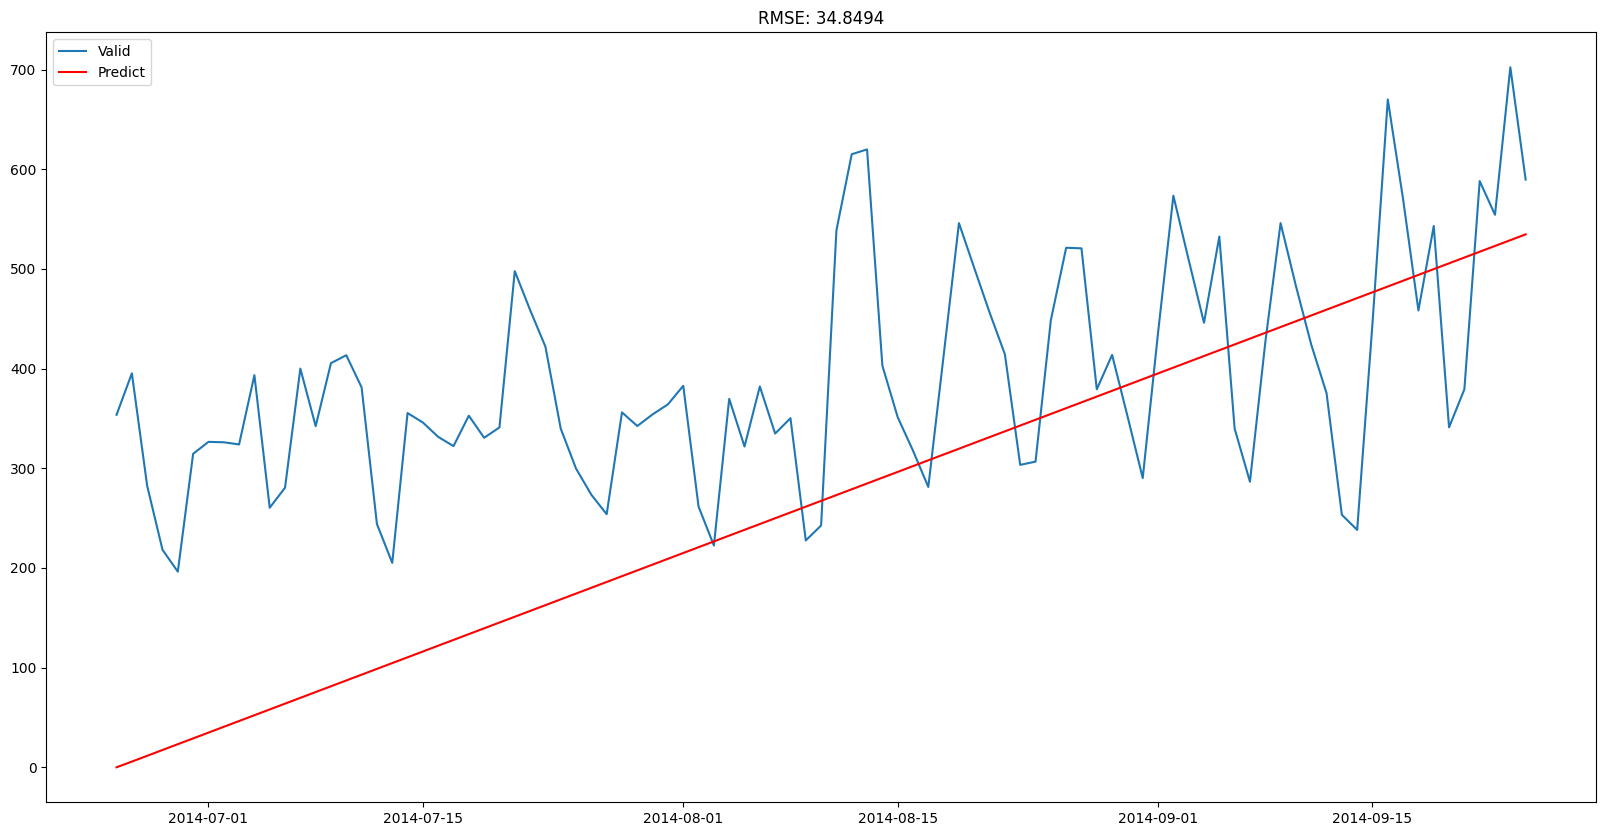

In [ ]:
AR_predict = result_AR.predict(start="2014-06-25",end="2014-09-25")
print(AR_predict)
AR_predict = AR_predict.cumsum().shift().fillna(0)
print(AR_predict)
AR_predict1 = pd.Series(np.ones(valid.shape[0])*np.log(valid["Count"])[0],index=valid.index)
print(AR_predict1)
AR_predict1 = AR_predict1.add(AR_predict,fill_value=0)
print(AR_predict1)
#AR_predict = np.exp(AR_predict1)

plt.plot(valid.Count, label="Valid")
plt.plot(AR_predict, color="red", label="Predict")
plt.legend(loc="best")
plt.title("RMSE: %.4f"%(np.sqrt(np.dot(AR_predict,valid["Count"]))/valid.shape[0]))
plt.show()

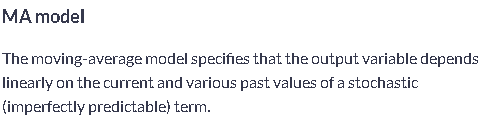

#### Combined Model

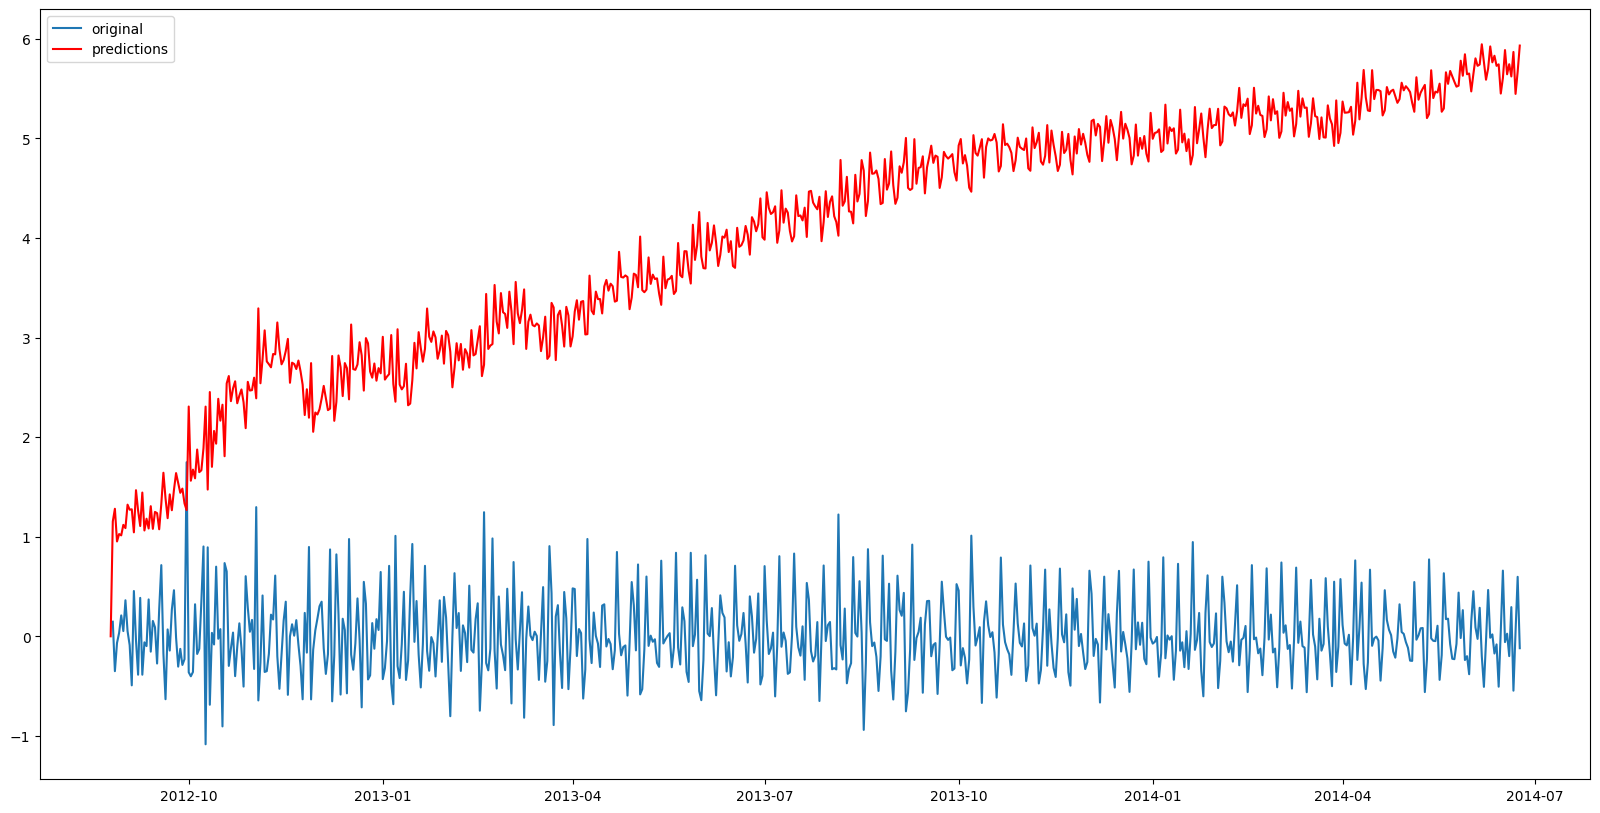

In [ ]:
model = ARIMA(Train_log, order=(2,1,2))
result_ARIMA = model.fit()
plt.plot(train_log_diff.dropna(), label="original")
plt.plot(result_ARIMA.fittedvalues, color="red", label="predictions")
plt.legend(loc="best")
plt.show()

#### SARIMAX model